<a href="https://colab.research.google.com/github/Andrey-Epifanov-k721/conv_networks/blob/master/SSD_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p style="align: center;"><img src="https://static.tildacdn.com/tild6636-3531-4239-b465-376364646465/Deep_Learning_School.png", width=500></p>

<h3 style="text-align: center;"><b>Физтех-Школа Прикладной математики и информатики (ФПМИ) МФТИ</b></h3>

---

<h1 style="text-align: center;"><b>Object detection</b></h1>

### Руководитель проекта:
* Юрий Яровиков (AIRI, МФТИ) | tg:@yu_rovikov

<h1 style="text-align: center;"><b>Треки на проекте</b></h1>
На этом проекте есть два возможных трека, из которых нужно выбрать один.

* **Первый трек --- исследовательский**. На этом треке вам предстоит самостоятельно обучить и протестировать предобученную модель детекции. Основной упор делается на моделирование и обучение. Необходимо будет попробовать несколько моделей детекции, самостоятельно реализовать метрики.

* **Второй трек --- продуктовый**. На этом треке вам не понадобится обучать свою модель детекции (хотя никто не запрещает вам это делать), но необходимо, во-первых, продумать **продуктовую составляющую проекта** (проблема людей, которая решается в данном проекте, целевая аудитория продукта, оптимальный способ внедрения модели), а также создать [MVP](https://ru.wikipedia.org/wiki/%D0%9C%D0%B8%D0%BD%D0%B8%D0%BC%D0%B0%D0%BB%D1%8C%D0%BD%D0%BE_%D0%B6%D0%B8%D0%B7%D0%BD%D0%B5%D1%81%D0%BF%D0%BE%D1%81%D0%BE%D0%B1%D0%BD%D1%8B%D0%B9_%D0%BF%D1%80%D0%BE%D0%B4%D1%83%D0%BA%D1%82) , **внедрив модель в цифровой сервис**, который может быть реализован как Telegram-бот, Web-демо, Desktop-приложение.

Вам необходимо выбрать основной сценарий, по которому вы пойдете, указав это при сдаче работы. При этом, никто не мешает вам совместить два трека, проведя и моделирование, и встраивание в демо. В этом случае мы рекомендуем пойти по **плану из второго трека**, а за моделирование будут ставиться бонусные баллы.

Обратите внимание, что суммарный балл по проекту не может превышать 10. Максимальный балл можно получить на любом из двух треков.

# Исследовательский трек
На этом треке вам предстоит самостоятельно обучить и протестировать предобученную модель детекции. Основной упор делается на моделирование и обучение. Необходимо попробовать несколько моделей детекции и провести их объективное сравнение в соответствии с целевой метрикой проекта.

## План работы




### 1. Выбор фреймворка/библиотеки для использования детектора (1 балл)

Чтобы освежить память о задаче детекции, можно посмотреть [занятия на продвинутом курсе](https://stepik.org/lesson/458312/step/1?unit=616130).

В выборе фреймворка предоставляется свобода, лично я рекомендовал бы один из:
- `torchvision.models.detection` и `torchhub`: "нативные" модели для детектирования прямо из PyTorch. Примеры использования есть прямо на занятиях DLSchool по практике CV [2019 года](https://www.youtube.com/watch?v=XSPYe4-y4HE) и [2020 года](https://stepik.org/lesson/458313/step/1?unit=616131);
- `mmdetection`: как с ним работать, рассказывается в [практическом занятии](https://stepik.org/lesson/458313/step/2?unit=616131).
- `detectron2`: краткая информация есть в конце [занятия DLSchool по практике CV](https://www.youtube.com/watch?v=XSPYe4-y4HE), можно начать с него. Лучше самостоятелньо изучить [официальный репозиторий](https://github.com/facebookresearch/detectron2) и уже с ним работать в дальнейшем ("Quick Start");
- `TensorFlow Object Detection API`: как с ним работать рассказывается в [занятии 2018 года](https://www.youtube.com/watch?v=xHIzyrU1uVM). Работать предстоит с [официальным репозиторием](https://github.com/tensorflow/models/tree/master/research/object_detection).

**Обратите внимание, что для получения полного балла по проекту необходимо обучить и сравнить как минимум две различные модели детекции (можно из одного фреймворка)!**


In [ ]:
# !pip uninstall Pillow==9.4.0
# !pip uninstall Pillow

In [ ]:
# import PIL
# print(PIL.__version__)

In [1]:
# нам необходима библиотека pillow 8.4.0 для преобразования изображений их аугментации и т.д.

# Если при первом запуске версия Pillow 9.4.0 то нужно перезапустить среду выполнения и повторить выполнение этой ячейки. Тогда установится версия Pillow 8.4.0

!pip install Pillow==8.4.0
import PIL
print(PIL.__version__)

8.4.0


In [3]:
!pip install -U torch torchvision

In [294]:
import torch
import numpy as np

train_on_gpu = torch.cuda.is_available()

if not train_on_gpu:
    print('CUDA is not available.  Training on CPU ...')
else:
    print('CUDA is available!  Training on GPU ...')

CUDA is not available.  Training on CPU ...


In [295]:
import pickle
import numpy as np
from skimage import io

from tqdm import tqdm, tqdm_notebook
from PIL import Image
from pathlib import Path

from torchvision import transforms
from multiprocessing.pool import ThreadPool
from sklearn.preprocessing import LabelEncoder
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn

from torch.optim import lr_scheduler


import torchvision.transforms.functional as TF
import matplotlib.pyplot as plt
from PIL import Image
from matplotlib import colors, pyplot as plt
%matplotlib inline

# в sklearn не все гладко, чтобы в colab удобно выводить картинки
# мы будем игнорировать warnings
import warnings
warnings.filterwarnings(action='ignore', category=DeprecationWarning)

### 2. Выбор датасета (0 баллов)

Вы можете выбрать любой датасет для детекции. Вот несколько идей:
1. [Детекция игровых карт](https://github.com/EdjeElectronics/TensorFlow-Object-Detection-API-Tutorial-Train-Multiple-Objects-Windows-10): лежат в папке images вместе с разметкой;
2. [Детекция фруктов](https://www.kaggle.com/mbkinaci/fruit-images-for-object-detection): скачать можно, нажав на кнопку Download;
3. [Детекция одежды (Deep Fashion 2)](https://github.com/switchablenorms/DeepFashion2): стоит прочитать README на главной странице репозитория. Для получения датасета нужно запросить пароль у автора через гугл-форму. После скачивания распакуйте его с использованием пароля. Из файлов аннотаций нас будут интересовать только `bounding_box`, `category_name` и `category_id`;
4. [Детекция лиц (Wider Face)](http://shuoyang1213.me/WIDERFACE/): большой датасет для детектирования лиц самых разных размеров. Скачать можно прямо по ссылкам на сайте;
5. [Детекция лиц (Kaggle)](https://www.kaggle.com/dataturks/face-detection-in-images): в датасете достаточно мало данных, но можно попробовать, если датасеты выше показались неподходящими для Вас;
6. Датасет из любого соревновани по детекции на Kaggle.

При работе с датасетом вы неизбежно столкнетесь с работой с файлами и папками (директориями). Рекомендуется освежить в памяти работу с библиотеками `os`, `json`, `glob`. Может помочь [этот туториал](https://realpython.com/working-with-files-in-python/).

> Результатом выполнения пункта явлется загруженный датасет, состоящий из изображений и разметки к ним (bounding box'ов всех объектов на каждом изображении).

In [6]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [7]:
!unzip -q /content/gdrive/MyDrive/archive.zip -d archive

In [296]:
IMAGES = Path('/content/archive/images')
LABELS = Path('/content/archive/labels')

In [297]:
for i in range(4):
    with open('/content/archive/labels/wider_{}.txt'.format(i), 'r') as f:
        for line in f:
            # Разбиваем строку на части
            parts = line.strip().split()
            # Форматируем строку с ограничением знаков после запятой
            formatted_line = (
                f"{parts[0]:<5} "
                f"{float(parts[1]):<15.4f} "
                f"{float(parts[2]):<15.4f} "
                f"{float(parts[3]):<15.4f} "
                f"{float(parts[4]):<15.4f}"
            )
            print(formatted_line)


0     0.4980          0.2917          0.1191          0.1076         
0     0.4805          0.1865          0.2568          0.2367         
0     0.0791          0.2930          0.0068          0.0104         
0     0.0830          0.3203          0.0137          0.0221         
0     0.1152          0.2852          0.0107          0.0195         
0     0.1377          0.3477          0.0146          0.0195         
0     0.1660          0.3359          0.0137          0.0221         
0     0.2012          0.2917          0.0098          0.0156         
0     0.1846          0.3568          0.0146          0.0221         
0     0.2480          0.3724          0.0176          0.0195         
0     0.3047          0.3555          0.0156          0.0221         
0     0.3281          0.3971          0.0156          0.0260         
0     0.3877          0.3776          0.0166          0.0247         
0     0.4062          0.3945          0.0205          0.0273         
0     0.4365        

это формат это (cx, cy, w, h)

### 3. Запуск детектора на случайных изображениях (1 балл)

В этом пункте вам необходимо применить модель детектирования в выбранном выше репозитории (по сути проверить, что инференс в модели работает). Таким образом, вы убедитесь, что модель работает, и сможет переходить к обучению.

> Результатом пункта явлется набор изображений, на которых модель успешно отработала и результат детекции виден и понятен.



In [298]:
import random
from PIL import Image, ImageDraw

In [299]:
image_files = list(IMAGES.glob('*.jpg'))

In [300]:
n = 1 # Количество случайных изображений для вывода
random_images = random.sample(image_files, n)

  0%|          | 0/1 [00:00<?, ?it/s]


Обработка изображения: wider_4190.jpg
Размер изображения: 1024x626
Координаты боксов (left, top, right, bottom):
  (45.00, 184.00, 67.00, 212.00)
  (106.00, 231.00, 118.00, 245.00)
  (118.00, 234.00, 138.00, 252.00)
  (135.50, 200.50, 150.50, 215.50)
  (169.50, 62.50, 210.50, 113.50)
  (246.00, 239.50, 266.00, 266.50)
  (224.50, 187.50, 243.50, 212.50)
  (267.00, 212.50, 291.00, 237.50)
  (306.50, 174.00, 319.50, 198.00)
  (327.00, 192.50, 353.00, 219.50)
  (364.50, 164.00, 387.50, 196.00)
  (381.50, 147.50, 394.50, 170.50)
  (385.50, 188.00, 406.50, 220.00)
  (429.00, 158.50, 453.00, 193.50)
  (465.00, 162.00, 477.00, 176.00)
  (516.50, 146.00, 529.50, 168.00)
  (500.00, 190.00, 522.00, 218.00)
  (525.50, 165.00, 548.50, 195.00)
  (541.00, 204.50, 559.00, 235.50)
  (590.50, 174.00, 619.50, 210.00)
  (585.00, 155.50, 609.00, 182.50)
  (617.50, 149.50, 640.50, 176.50)
  (540.00, 131.50, 554.00, 146.50)
  (593.00, 112.00, 607.00, 134.00)
  (639.50, 101.50, 658.50, 122.50)
  (714.00, 98.

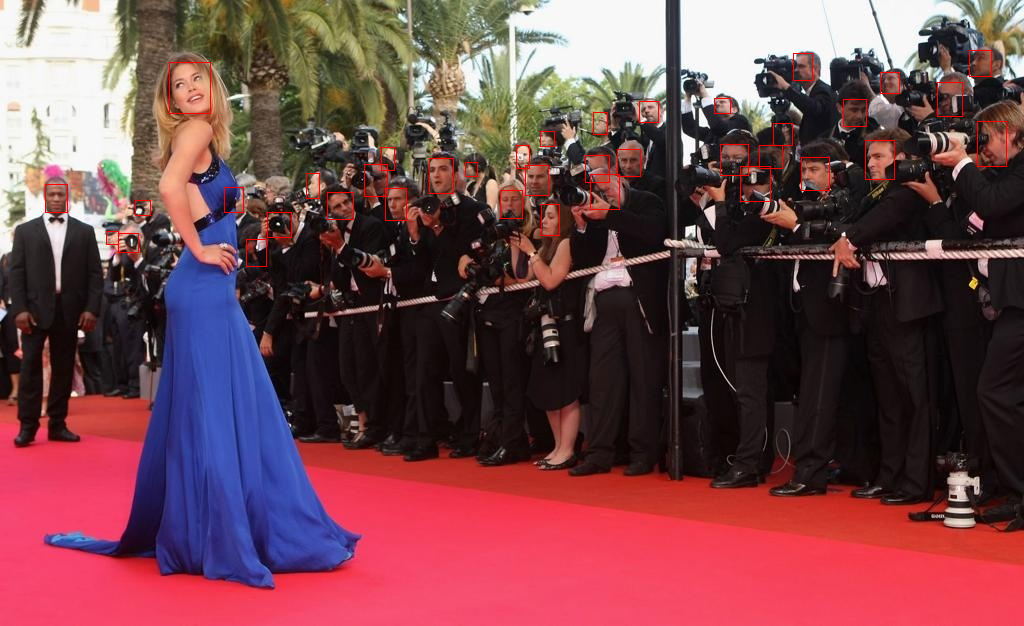

100%|██████████| 1/1 [00:00<00:00,  3.29it/s]


In [301]:
from tqdm import tqdm
from PIL import Image, ImageDraw
from pathlib import Path

# Цикл по изображениям
for image_path in tqdm(random_images):
    # Загрузка изображения
    image = Image.open(image_path)
    image_width, image_height = image.size

    # Получение соответствующей метки
    label_path = LABELS / (image_path.stem + '.txt')
    with open(label_path, 'r') as f:
        # Чтение координат боксов из метки
        boxes = [list(map(float, line.strip().split())) for line in f]

    # Рисование боксов на изображении
    draw = ImageDraw.Draw(image)
    print(f"\nОбработка изображения: {image_path.name}")
    print(f"Размер изображения: {image_width}x{image_height}")
    print("Координаты боксов (left, top, right, bottom):")
    for box in boxes:
        x, y, w, h = box[1:]  # Пропускаем первый элемент, так как он не используется
        left = (x - w / 2) * image_width
        top = (y - h / 2) * image_height
        right = (x + w / 2) * image_width
        bottom = (y + h / 2) * image_height
        print(f"  ({left:.2f}, {top:.2f}, {right:.2f}, {bottom:.2f})")
        draw.rectangle([left, top, right, bottom], outline='red')

    # Вывод изображения
    image.show()


  0%|          | 0/1 [00:00<?, ?it/s]


Обработка изображения: wider_4190.jpg
Размер изображения: 1024x626
Координаты боксов (x_center, y_center, width, height):
  (0.0547, 0.3163,  0.0215,  0.0447)
  (0.1094, 0.3802,  0.0117,  0.0224)
  (0.1250, 0.3882,  0.0195,  0.0288)
  (0.1396, 0.3323,  0.0146,  0.0240)
  (0.1855, 0.1406,  0.0400,  0.0815)
  (0.2500, 0.4042,  0.0195,  0.0431)
  (0.2285, 0.3195,  0.0186,  0.0399)
  (0.2725, 0.3594,  0.0234,  0.0399)
  (0.3057, 0.2971,  0.0127,  0.0383)
  (0.3320, 0.3291,  0.0254,  0.0431)
  (0.3672, 0.2875,  0.0225,  0.0511)
  (0.3789, 0.2540,  0.0127,  0.0367)
  (0.3867, 0.3259,  0.0205,  0.0511)
  (0.4307, 0.2812,  0.0234,  0.0559)
  (0.4600, 0.2700,  0.0117,  0.0224)
  (0.5107, 0.2508,  0.0127,  0.0351)
  (0.4990, 0.3259,  0.0215,  0.0447)
  (0.5244, 0.2875,  0.0225,  0.0479)
  (0.5371, 0.3514,  0.0176,  0.0495)
  (0.5908, 0.3067,  0.0283,  0.0575)
  (0.5830, 0.2700,  0.0234,  0.0431)
  (0.6143, 0.2604,  0.0225,  0.0431)
  (0.5342, 0.2220,  0.0137,  0.0240)
  (0.5859, 0.1965,  0.0137

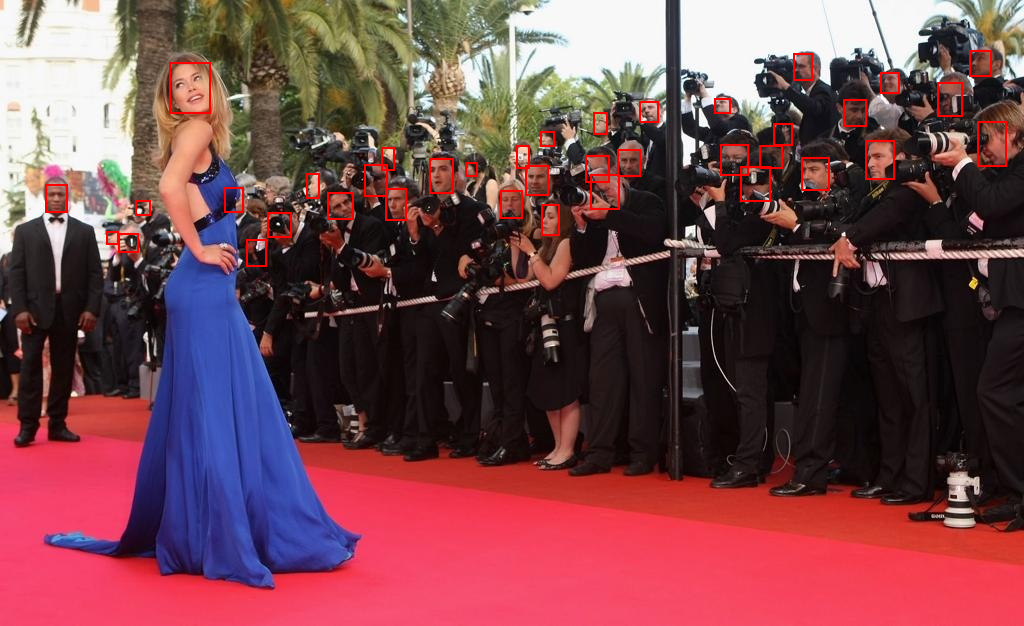

100%|██████████| 1/1 [00:00<00:00,  4.79it/s]


In [302]:
from tqdm import tqdm
from PIL import Image, ImageDraw
from pathlib import Path



# Цикл обработки изображений
for image_path in tqdm(random_images):
    try:
        # Загрузка изображения
        image = Image.open(image_path)
        image_width, image_height = image.size

        # Получение пути к метке
        label_path = LABELS / (image_path.stem + '.txt')

        # Чтение меток
        with open(label_path, 'r') as f:
            # Предполагаем, что каждая строка файла содержит:
            # class_id x_center y_center width height
            boxes = [list(map(float, line.strip().split())) for line in f]

        # Рисование боксов на изображении
        draw = ImageDraw.Draw(image)
        print(f"\nОбработка изображения: {image_path.name}")
        print(f"Размер изображения: {image_width}x{image_height}")
        print("Координаты боксов (x_center, y_center, width, height):")

        for box in boxes:
            x_center, y_center, box_width, box_height = box[1:]  # Пропускаем первый элемент (class_id)

            # Вывод координат боксов в формате xywh
            print(f"  ({x_center:.4f}, {y_center:.4f},  {box_width:.4f},  {box_height:.4f})")

            # Преобразование xywh для рисования (без изменения оригинального формата)
            rect_left = (x_center - box_width / 2) * image_width
            rect_top = (y_center - box_height / 2) * image_height
            rect_right = (x_center + box_width / 2) * image_width
            rect_bottom = (y_center + box_height / 2) * image_height

            # Рисование прямоугольника
            draw.rectangle([rect_left, rect_top, rect_right, rect_bottom], outline='red', width=2)

        # Отображение изображения
        image.show()

    except FileNotFoundError:
        print(f"Метка для изображения {image_path.name} не найдена. Пропускаем.")
    except Exception as e:
        print(f"Ошибка при обработке изображения {image_path.name}: {e}")


### 4. Предобработка данных (2 балла)

Самый непростой этап в этом сценарии. Скачать данные $-$ лишь половина дела. Чтобы обучить нейросеть на этих данных, нужно написать генератор батчей. Однако если будем подавать изображения так, как они есть, то даже батч собрать не сможем -- нужно привести их к однмоу размеру. Далее нужно привести их к типу float, переместить на CUDA и поделить значения в пикселях на 255 (подробнее см. [занятие](https://www.youtube.com/watch?v=XSPYe4-y4HE)). Также нужно настроить аугментации и постобработку.

То, как именно все это реализовать $-$ зависит от инструмента, выбранного в пункте 1. Например, в detectron2 в обучающих материалах описан формат данных для обучения. Возможно, нужно будет зайти в документацию и почитать более подробно, чтобы разобраться, какой именно нужен формат координат.

НЕ нужно копировать все файлы с картинками и разметкой прямо на диске в их предобработанные версии. Хороший тон $-$ осуществлять всю эту обработку программно, "на лету". Поможет [туториал](https://pytorch.org/tutorials/beginner/data_loading_tutorial.html) по написанию своего датасета на PyTorch.

> Результатом выполнения пункта явлется код, запуск которого ведет к подаче батчей правильного вида (разметка приведена к требуемому формату координат, изображения нужного типа, размера и поделены на 255 и т.д.) для обучения нейронной сети-детектора.

In [15]:
# from PIL import Image
# import os

# # Инициализация переменных для хранения максимальных и минимальных размеров
# max_width, max_height = 0, 0
# min_width, min_height = float('inf'), float('inf')

# # Инициализация массивов для хранения индексов изображений с максимальными и минимальными размерами
# max_size_indices = []
# min_size_indices = []

# # Перебор изображений в директории
# for i, image_file in tqdm(enumerate(os.listdir(IMAGES))):
#     image_path = IMAGES / image_file

#     # Загрузка изображения
#     image = Image.open(image_path)

#     # Получение размеров изображения
#     width, height = image.size

#     # Обновление максимальных и минимальных размеров
#     max_width = max(max_width, width)
#     max_height = max(max_height, height)
#     min_width = min(min_width, width)
#     min_height = min(min_height, height)

#     # Проверка, является ли текущее изображение максимальным или минимальным по размеру
#     if width == max_width and height == max_height:
#         max_size_indices.append(i)
#     if width == min_width and height == min_height:
#         min_size_indices.append(i)

# # Вывод максимальных и минимальных размеров на экран
# print("Максимальные размеры изображения:")
# print("Ширина:", max_width)
# print("Высота:", max_height)
# print()
# print("Минимальные размеры изображения:")
# print("Ширина:", min_width)
# print("Высота:", min_height)
# print()
# print("Кол-во изображений с минимальными размерами: ", len(min_size_indices))
# print("Кол-во изображений с максимальными размерами: ", len(max_size_indices))

In [ ]:
# # Вывод изображений с максимальными размерами
# print("Изображения с максимальными размерами:")
# for index in max_size_indices:
#     image_file = os.listdir(IMAGES)[index]
#     image_path = IMAGES / image_file
#     image = Image.open(image_path)
#     image.show()

In [ ]:
# # Вывод изображений с минимальными размерами
# print("Изображения с минимальными размерами:")
# for index in min_size_indices:
#     image_file = os.listdir(IMAGES)[index]
#     image_path = IMAGES / image_file
#     image = Image.open(image_path)
#     image.show()


In [303]:
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

In [304]:
def collate_fn(batch):
    images, targets = zip(*batch)

    # Find the maximum number of targets in a batch
    max_num_targets = max(len(target) for target in targets)

    # Initialize a tensor for targets with the maximum number of targets
    # Padding targets with zeros if they have fewer targets
    padded_targets = torch.zeros((len(targets), max_num_targets, 5), dtype=torch.float32)

    for i, target in enumerate(targets):
        if len(target) > 0:
            end = len(target)
            padded_targets[i, :end] = torch.tensor(target)

    images = torch.stack(images)

    return images, padded_targets

In [306]:
def convert_yolo_to_xywh(line):
    """Convert YOLO format (class, cx, cy, w, h) to (class, x1, y1, x2, y2)"""
    parts = line.strip().split()
    class_id = int(parts[0])
    cx, cy, w, h = map(float, parts[1:5])

    x1 = cx - w/2
    y1 = cy - h/2
    x2 = cx + w/2
    y2 = cy + h/2

    # Проверка и корректировка
    x1, x2 = min(x1, x2), max(x1, x2)
    y1, y2 = min(y1, y2), max(y1, y2)

    return [class_id, x1, y1, x2, y2]

In [17]:
import torch
from torch.utils.data import Dataset, DataLoader, Subset
from torchvision import transforms
from pathlib import Path
from PIL import Image, ImageDraw

class CustomImageDataset(Dataset):
    def __init__(self, images_dir, labels_dir, transform=None):
        self.images_dir = Path(images_dir)
        self.labels_dir = Path(labels_dir)
        self.transform = transform
        self.image_files = list(self.images_dir.glob('*.jpg'))
        self.labels = self._load_labels()

    def _load_labels(self):
        labels = []
        for img_path in self.image_files:
            label_path = self.labels_dir / (img_path.stem + '.txt')
            if not label_path.exists():
                raise FileNotFoundError(f"Label file not found: {label_path}")
            with open(label_path, 'r') as f:
                label = [list(map(float, line.strip().split())) for line in f]  # Чтение всех строк и преобразование в список списков
                labels.append(label)
        return labels

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        img_path = self.image_files[idx]
        image = Image.open(img_path).convert('RGB')
        label = self.labels[idx]

        if self.transform:
            image = self.transform(image)

        return image, label

# Преобразования изображений
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]
transform = transforms.Compose([
            transforms.Resize((256, 256)),  # Изменение размера изображения
            transforms.CenterCrop((256, 256)),  # Обрезка изображения до заданного размера
            transforms.ToTensor(),  # Преобразование в тензор
            transforms.Normalize(mean, std)
])

# Создание экземпляра датасета
dataset = CustomImageDataset(IMAGES, LABELS, transform=transform)

In [332]:
import torch
from torch.utils.data import Dataset, DataLoader, Subset
from torchvision import transforms
from pathlib import Path
from PIL import Image, ImageDraw

def convert_yolo_to_xywh(line):
    """Convert YOLO format (class, cx, cy, w, h) to (class, x1, y1, x2, y2)"""
    parts = line.strip().split()
    class_id = int(parts[0])
    cx, cy, w, h = map(float, parts[1:5])

    x1 = cx - w/2
    y1 = cy - h/2
    x2 = cx + w/2
    y2 = cy + h/2

    # Проверка и корректировка
    x1, x2 = min(x1, x2), max(x1, x2)
    y1, y2 = min(y1, y2), max(y1, y2)

    return [class_id, x1, y1, x2, y2]

class CustomImageDataset(Dataset):
    def __init__(self, images_dir, labels_dir, transform=None):
        self.images_dir = Path(images_dir)
        self.labels_dir = Path(labels_dir)
        self.transform = transform
        self.image_files = list(self.images_dir.glob('*.jpg'))
        self.labels = self._load_labels()

    def _load_labels(self):
        labels = []
        for img_path in self.image_files:
            label_path = self.labels_dir / (img_path.stem + '.txt')
            if not label_path.exists():
                raise FileNotFoundError(f"Label file not found: {label_path}")
            with open(label_path, 'r') as f:
                # Применяем convert_yolo_to_xywh к каждой строке файла
                label = [convert_yolo_to_xywh(line) for line in f]
                labels.append(label)
        return labels

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        img_path = self.image_files[idx]
        image = Image.open(img_path).convert('RGB')
        label = self.labels[idx]

        if self.transform:
            image = self.transform(image)

        # Преобразуем метки в тензор
        label_tensor = torch.tensor(label, dtype=torch.float32)
        return image, label_tensor

# Преобразования изображений
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]
transform = transforms.Compose([
            transforms.Resize((256, 256)),
            transforms.CenterCrop((256, 256)),
            transforms.ToTensor(),
            transforms.Normalize(mean, std)
])

# Создание экземпляра датасета
dataset = CustomImageDataset(IMAGES, LABELS, transform=transform)

In [333]:
# Определение размеров тренировочного, валидационного и тестового наборов данных
train_size = int(0.05 * len(dataset))  # 60% данных для тренировки
val_size = int(0.2 * len(dataset))  # 20% данных для валидации
test_size = len(dataset) - train_size - val_size  # Оставшиеся 20% данных для тестирования

# Разделение данных на тренировочные, валидационные и тестовые наборы данных
indices = torch.randperm(len(dataset)).tolist()
train_indices = indices[:train_size]
val_indices = indices[train_size:train_size + val_size]
test_indices = indices[train_size + val_size:]

# Создание Subset для каждого набора данных
data_tr = Subset(dataset, train_indices)
data_val = Subset(dataset, val_indices)
data_test = Subset(dataset, test_indices)

# Создание DataLoader для каждого набора данных
batch_size = 8

train_loader = DataLoader(data_tr, batch_size=batch_size, shuffle=True, collate_fn=collate_fn, pin_memory=True)
val_loader = DataLoader(data_val, batch_size=batch_size, shuffle=False, collate_fn=collate_fn,pin_memory=True)
test_loader = DataLoader(data_test, batch_size=batch_size, shuffle=False, collate_fn=collate_fn, pin_memory=True)


После предобработки в transform максимальная и минимальная ширина иммет размеры:

Максимальные размеры изображения:
Ширина: 256
Высота: 256

Минимальные размеры изображения:
Ширина: 256
Высота: 256

Кол-во изображений с минимальными размерами: 12880
Кол-во изображений с максимальными размерами: 12880


### Проверки

In [19]:
import torch

# Функция для нахождения минимального и максимального значений в DataLoader
def compute_min_max(data_loader):
    global_min = float('inf')  # Начальное значение минимума
    global_max = float('-inf')  # Начальное значение максимума

    for batch_idx, (images, targets) in enumerate(data_loader):

        if batch_idx >= 5:  # Прекращаем цикл после обработки 5 батчей
            break
        # Предполагается, что images имеет тип Tensor с размерностью (batch_size, C, H, W)
        batch_min = images.min().item()  # Минимальное значение в текущем батче
        batch_max = images.max().item()  # Максимальное значение в текущем батче

        # Обновляем глобальные минимальные и максимальные значения
        global_min = min(global_min, batch_min)
        global_max = max(global_max, batch_max)

        print(f"Batch {batch_idx + 1}: Min = {batch_min}, Max = {batch_max}")

    print("\n=== Global Min and Max ===")
    print(f"Global Min: {global_min}")
    print(f"Global Max: {global_max}")

# Использование функции с train_loader
compute_min_max(train_loader)


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Batch 1: Min = -2.1179039478302, Max = 2.640000104904175
Batch 2: Min = -2.1179039478302, Max = 2.640000104904175
Batch 3: Min = -2.1179039478302, Max = 2.640000104904175
Batch 4: Min = -2.1179039478302, Max = 2.640000104904175
Batch 5: Min = -2.1179039478302, Max = 2.640000104904175

=== Global Min and Max ===
Global Min: -2.1179039478302
Global Max: 2.640000104904175


In [ ]:
# Проверка типов подмножеств
print(type(data_tr))  # <class 'torch.utils.data.dataset.Subset'>
print(type(data_val))  # <class 'torch.utils.data.dataset.Subset'>
print(type(data_test))  # <class 'torch.utils.data.dataset.Subset'>

print(type(train_loader))  # <class 'torch.utils.data.dataloader.DataLoader'>
print(type(val_loader))  # <class 'torch.utils.data.dataloader.DataLoader'>
print(type(test_loader))  # <class 'torch.utils.data.dataloader.DataLoader'>

# Пример использования DataLoader для проверки загрузки данных
# по второй размерности отображается максимальное количество таргет боксов которые встречаются в 32 батчах (32 изображениях)
for images, labels in train_loader:
    print(images.shape, labels.shape)
    break

for images, labels in val_loader:
    print(images.shape, labels.shape)
    break

for images, labels in test_loader:
    print(images.shape, labels.shape)
    break

<class 'torch.utils.data.dataset.Subset'>
<class 'torch.utils.data.dataset.Subset'>
<class 'torch.utils.data.dataset.Subset'>
<class 'torch.utils.data.dataloader.DataLoader'>
<class 'torch.utils.data.dataloader.DataLoader'>
<class 'torch.utils.data.dataloader.DataLoader'>
torch.Size([8, 3, 256, 256]) torch.Size([8, 30, 5])
torch.Size([8, 3, 256, 256]) torch.Size([8, 28, 5])
torch.Size([8, 3, 256, 256]) torch.Size([8, 73, 5])


In [ ]:
#  проверка часть 1

import torch
import matplotlib.pyplot as plt
import seaborn as sns

# Предположим, что train_loader уже определен
all_labels = []

# Сбор данных из всего train_loader
for images, labels in train_loader:
    all_labels.append(labels[:, :, 1:])  # Собираем все метки без первого столбца (это идентификаторы)

/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Размерность всех собранных labels: torch.Size([31104, 4])
Минимальное значение среди всех labels: 0.0
Максимальное значение среди всех labels: 0.9970703125


<ipython-input-19-a41990e51009>:27: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(all_labels_tensor.numpy().flatten(), shade=True)


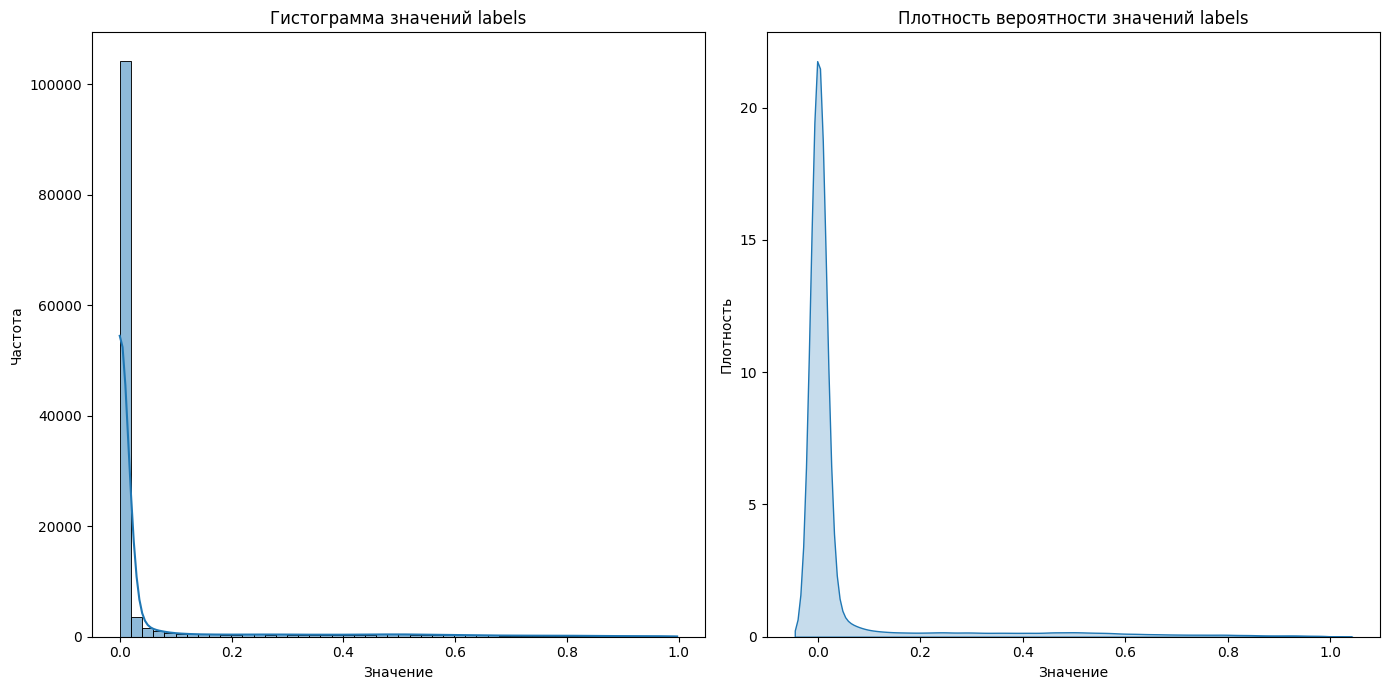

Средние значения для каждого из 4 признаков в labels:
tensor([0.1062, 0.0801, 0.0068, 0.0114])
Стандартное отклонение для каждого из 4 признаков в labels:
tensor([0.2382, 0.1808, 0.0260, 0.0404])
Общее среднее значение среди всех labels: 0.05111536756157875
Общее стандартное отклонение среди всех labels: 0.1046074628829956


In [ ]:
#  проверка часть 2 (продолжение)

# Объединение всех собранных данных
all_labels_tensor = torch.cat([batch.view(-1, 4) for batch in all_labels], dim=0)

print("Размерность всех собранных labels:", all_labels_tensor.size())

# Расчет минимальных и максимальных значений
min_value = torch.min(all_labels_tensor)
max_value = torch.max(all_labels_tensor)

print("Минимальное значение среди всех labels:", min_value.item())
print("Максимальное значение среди всех labels:", max_value.item())

# Визуализация распределения значений labels
plt.figure(figsize=(14, 7))

# Построение гистограммы
plt.subplot(1, 2, 1)
sns.histplot(all_labels_tensor.numpy().flatten(), bins=50, kde=True)
plt.title("Гистограмма значений labels")
plt.xlabel("Значение")
plt.ylabel("Частота")

# Построение плотности вероятности
plt.subplot(1, 2, 2)
sns.kdeplot(all_labels_tensor.numpy().flatten(), shade=True)
plt.title("Плотность вероятности значений labels")
plt.xlabel("Значение")
plt.ylabel("Плотность")

plt.tight_layout()
plt.show()

# Дополнительный анализ распределения
mean_values = torch.mean(all_labels_tensor, dim=0)
std_values = torch.std(all_labels_tensor, dim=0)

print("Средние значения для каждого из 4 признаков в labels:")
print(mean_values)

print("Стандартное отклонение для каждого из 4 признаков в labels:")
print(std_values)

overall_mean = torch.mean(mean_values)
overall_std = torch.std(std_values)

print("Общее среднее значение среди всех labels:", overall_mean.item())
print("Общее стандартное отклонение среди всех labels:", overall_std.item())


Выяснили что таргет данные имеют значения от 0 до 1.
Значит нужно при вычислении IoU метрики нормировать выходные данные из архитектуры нейросети.

In [ ]:
# Средние значения для каждого из 4 признаков в labels:
# tensor([0.1013, 0.0806, 0.0059, 0.0100])
# Стандартное отклонение для каждого из 4 признаков в labels:
# tensor([0.2338, 0.1842, 0.0236, 0.0361])
# Общее среднее значение среди всех labels: 0.04946637898683548
# Общее стандартное отклонение среди всех labels: 0.10551333427429199

In [ ]:
# Средние значения для каждого из 4 признаков в labels:
# tensor([0.1001, 0.0797, 0.0058, 0.0099])
# Стандартное отклонение для каждого из 4 признаков в labels:
# tensor([0.2327, 0.1833, 0.0234, 0.0359])
# Общее среднее значение среди всех labels: 0.04888257756829262
# Общее стандартное отклонение среди всех labels: 0.10501722991466522

Train Loader:


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


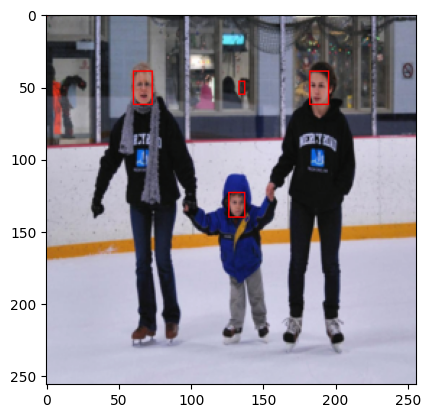

Validation Loader:


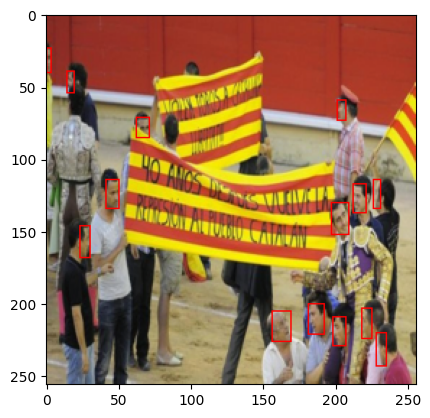

Test Loader:


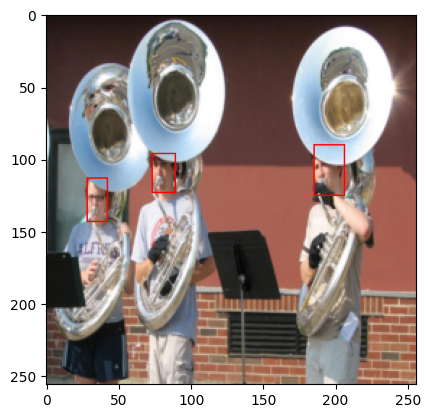

In [ ]:
import matplotlib.pyplot as plt
import torchvision.transforms.functional as F

def show_images_with_boxes(loader, num_images=1):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    images_displayed = 0

    for images, labels in loader:
        if images_displayed >= num_images:
            break
        for i in range(images.size(0)):
            if images_displayed >= num_images:
                break
            image = images[i].cpu()  # Переместить изображение на CPU для отображения
            label = labels[i].cpu()  # Переместить метки на CPU для отображения

            # Преобразование изображения обратно к его исходной форме
            image = F.normalize(image, mean=[-m/s for m, s in zip(mean, std)], std=[1/s for s in std])
            image = F.to_pil_image(image)

            # Рисование боксов на изображении
            draw = ImageDraw.Draw(image)
            for box in label:
                x, y, w, h = box[1:]  # Пропускаем первый элемент, так как он не используется
                left = (x - w/2) * image.width
                top = (y - h/2) * image.height
                right = (x + w/2) * image.width
                bottom = (y + h/2) * image.height
                draw.rectangle([left, top, right, bottom], outline='red')

            # Отображение изображения
            plt.figure()
            plt.imshow(image)
            plt.show()

            images_displayed += 1

# Пример использования для train_loader, val_loader и test_loader
print("Train Loader:")
show_images_with_boxes(train_loader)

print("Validation Loader:")
show_images_with_boxes(val_loader)

print("Test Loader:")
show_images_with_boxes(test_loader)

In [ ]:
# кол-во изображений в тренировочном, валидационном и тестовом наборах
len(data_tr), len(data_val), len(data_test)

(644, 2576, 9660)

### 5. Обучение моделей-детекторов (3 балла)

Необходимо написать цикл обучения на PyTorch самостоятельно -- это основной критерий в этом пункте. Необходимо обучить обе выбранные модели.

In [334]:
import torch

def calculate_iou(predicted_boxes, target_boxes):
    """
    Вычисляет IoU между предсказанными и таргетными bounding box.

    Args:
    predicted_boxes (torch.Tensor): [batch_size, num_predicted_boxes, 4] в формате (cx, cy, w, h).
    target_boxes (torch.Tensor): [batch_size, num_target_boxes, 4] в формате (cx, cy, w, h).

    Returns:
    torch.Tensor: IoU [batch_size, num_predicted_boxes, num_target_boxes].
    """
    # Разбираем предсказанные и таргетные боксы на компоненты
    cx1, cy1, w1, h1 = predicted_boxes[..., 0], predicted_boxes[..., 1], predicted_boxes[..., 2], predicted_boxes[..., 3]
    cx2, cy2, w2, h2 = target_boxes[..., 0], target_boxes[..., 1], target_boxes[..., 2], target_boxes[..., 3]

    # Вычисляем координаты углов для предсказанных и таргетных боксов
    x_min1 = cx1 - w1 / 2
    y_min1 = cy1 - h1 / 2
    x_max1 = cx1 + w1 / 2
    y_max1 = cy1 + h1 / 2

    x_min2 = cx2 - w2 / 2
    y_min2 = cy2 - h2 / 2
    x_max2 = cx2 + w2 / 2
    y_max2 = cy2 + h2 / 2

    # Вычисляем координаты пересечения
    inter_x_min = torch.max(x_min1.unsqueeze(2), x_min2.unsqueeze(1))
    inter_y_min = torch.max(y_min1.unsqueeze(2), y_min2.unsqueeze(1))
    inter_x_max = torch.min(x_max1.unsqueeze(2), x_max2.unsqueeze(1))
    inter_y_max = torch.min(y_max1.unsqueeze(2), y_max2.unsqueeze(1))

    # Площадь пересечения
    inter_area = torch.clamp(inter_x_max - inter_x_min, min=0) * torch.clamp(inter_y_max - inter_y_min, min=0)

    # Площади предсказанных и таргетных боксов
    area1 = w1 * h1
    area2 = w2 * h2

    # Площадь объединения
    union_area = area1.unsqueeze(2) + area2.unsqueeze(1) - inter_area
    union_area = torch.clamp(union_area, min=1e-6)  # Предотвращаем деление на 0

    # Вычисляем IoU
    ious_tensor = inter_area / union_area

    return ious_tensor


In [335]:
class IoULoss(nn.Module):
    def __init__(self):
        super(IoULoss, self).__init__()

    def forward(self, pred_boxes, target_boxes):
        locs, confs = pred_boxes  # Распаковываем кортеж

        # print("(IoULoss) locs: ", type(locs), locs.size())
        # print("(IoULoss) confs: ", type(confs), confs.size())

        # Координаты предсказанных боксов
        pred_boxes_locs = locs
        # Координаты целевых боксов (обрезаем только координаты для bbox)
        target_boxes_locs = target_boxes[:, :, 1:]

        # print("(IoULoss) pred_boxes_locs: ", type(pred_boxes_locs), pred_boxes_locs.size())
        # print("(IoULoss) target_boxes_locs: ", type(target_boxes_locs), target_boxes_locs.size())

        # Рассчитываем IoU между предсказанными и целевыми боксами
        ious = calculate_iou(pred_boxes_locs, target_boxes_locs)


        # Применяем порог для отбора IoU > 0.5
        positive_mask = ious > 0.5  # Порог IoU, можно настроить
        ious_positive = ious[positive_mask]
        print("\n")

        # Если нет положительных positive_mask, используем все IoU
        if ious_positive.numel() == 0:
            print("No positive IoU, fallback to all IoUs")
            # ious_positive = ious
            ious_positive = torch.tensor(0.0, requires_grad=True).to(device)

        # IoU loss как 1 - среднее положительных IoU
        iou_loss = 1 - ious_positive.mean()

        # # Cross-entropy loss для классификации
        # confs_flat = confs.view(-1, confs.size(-1))
        # target_flat = target_boxes[:, :, 0].view(-1)

        # if confs_flat.size(0) != target_flat.size(0):
        #     min_size = min(confs_flat.size(0), target_flat.size(0))
        #     confs_flat = confs_flat[:min_size]
        #     target_flat = target_flat[:min_size]

        # ce_loss = nn.CrossEntropyLoss()(confs_flat, target_flat.long())

        # print("(IoULoss) ce_loss: ", ce_loss)

        # Взвешенная сумма IoU loss и Cross-entropy loss
        # total_loss = iou_loss + ce_loss

        # print("(IoULoss) total_loss: ", total_loss)

        print("___ iou_loss: ", iou_loss)
        # print("___ ce_loss: ", ce_loss)
        # print("___ total_loss: ", total_loss)

        return iou_loss


In [336]:
def center_to_corners(boxes):
    """Convert center-size boxes to xmin-ymin-xmax-ymax"""
    return torch.cat((
        boxes[:, :2] - boxes[:, 2:]/2,
        boxes[:, :2] + boxes[:, 2:]/2), dim=1)

def box_iou(box1, box2):
    """Calculate IoU between two sets of boxes"""
    # Реализация расчета IoU
    ...

def encode(matched, priors):
    """Encode the variances from the priorbox layers into the ground truth boxes"""
    # Реализация кодирования координат
    ...

def decode(loc, priors):
    """Decode locations from predictions using priors"""
    # Обратная операция для inference
    ...

In [337]:
class SSDLoss(nn.Module):
    def __init__(self, num_classes, prior_boxes, overlap_thresh=0.5):
        super().__init__()
        self.num_classes = num_classes
        self.threshold = overlap_thresh
        self.prior_boxes = prior_boxes  # [num_priors, 4] в формате (cx, cy, w, h)
        self.smooth_l1 = nn.SmoothL1Loss(reduction='sum')
        self.ce_loss = nn.CrossEntropyLoss(reduction='none')

    def _validate_boxes(self, boxes):
        """Проверка валидности bounding boxes"""
        if boxes.size(0) == 0:
            return False
        if not torch.all(boxes[:, 2:] > boxes[:, :2]):
            print("Invalid boxes: x2 <= x1 or y2 <= y1")
            return False
        if torch.any(boxes < 0) or torch.any(boxes > 1):
            print("Box coordinates out of [0,1] range")
            return False
        return True

    def _encode(self, matched, priors):
        """Кодирование координат в offsets относительно prior boxes"""
        g_cxcy = (matched[:, :2] + matched[:, 2:]) / 2 - priors[:, :2]
        g_cxcy /= (priors[:, 2:] * 0.1)
        g_wh = (matched[:, 2:] - matched[:, :2]) / priors[:, 2:]
        g_wh = torch.log(g_wh) / 0.2
        return torch.cat([g_cxcy, g_wh], dim=1)

    def forward(self, predictions, targets):
        locs, confs = predictions
        device = locs.device
        batch_size = locs.size(0)
        num_priors = self.prior_boxes.size(0)

        # Инициализация целевых значений
        loc_t = torch.zeros(batch_size, num_priors, 4, device=device)
        conf_t = torch.zeros(batch_size, num_priors, dtype=torch.long, device=device)

        # Преобразуем prior boxes в corner-формат один раз
        prior_boxes_corners = center_to_corners(self.prior_boxes)

        for i in range(batch_size):
            truths = targets[i][:, :4]
            labels = targets[i][:, 4]

            # Пропускаем изображения без объектов
            if truths.size(0) == 0:
                continue

            # Проверка валидности координат
            if not self._validate_boxes(truths):
                continue

            # Вычисление IoU между приорными боксами и ground truth
            overlaps = box_iou(prior_boxes_corners, truths)

            # Проверка результата box_iou
            if overlaps is None:
                print("Warning: box_iou returned None for image", i)
                continue

            # Находим соответствия
            best_truth_overlap, best_truth_idx = overlaps.max(1)
            best_prior_overlap, best_prior_idx = overlaps.max(0)

            # Гарантируем matching для каждого ground truth
            for j in range(best_prior_idx.size(0)):
                best_truth_idx[best_prior_idx[j]] = j
                best_truth_overlap[best_prior_idx[j]] = 2  # Значение > threshold

            # Сохраняем matched targets
            matches = truths[best_truth_idx]
            conf = labels[best_truth_idx] + 1  # +1 так как 0 - это фон
            conf[best_truth_overlap < self.threshold] = 0  # Неподходящие = фон

            # Кодируем координаты
            loc_t[i] = self._encode(matches, self.prior_boxes)
            conf_t[i] = conf

        # Потери локализации (только для позитивных примеров)
        pos_mask = conf_t > 0
        num_pos = pos_mask.sum(dim=1, keepdim=True)

        # Если нет позитивных примеров, возвращаем нулевую loss
        if num_pos.sum() == 0:
            return torch.tensor(0.0, device=locs.device, requires_grad=True)

        # Вычисляем потери локализации
        pos_idx = pos_mask.unsqueeze(pos_mask.dim()).expand_as(locs)
        loc_p = locs[pos_idx].view(-1, 4)
        loc_t = loc_t[pos_idx].view(-1, 4)
        loss_l = self.smooth_l1(loc_p, loc_t)

        # Потери классификации с hard negative mining
        batch_conf = confs.view(-1, self.num_classes)
        loss_c = self.ce_loss(batch_conf, conf_t.view(-1))

        # Hard negative mining
        loss_c = loss_c.view(batch_size, -1)
        loss_c[pos_mask] = 0  # Игнорируем позитивные примеры

        # Находим топ-N негативных примеров
        _, loss_idx = loss_c.sort(1, descending=True)
        _, idx_rank = loss_idx.sort(1)

        num_neg = torch.clamp(3*num_pos, max=pos_mask.size(1)-1)
        neg_mask = idx_rank < num_neg.expand_as(idx_rank)

        # Фильтруем конфиденсы для позитивных и негативных примеров
        pos_idx = pos_mask.unsqueeze(2).expand_as(confs)
        neg_idx = neg_mask.unsqueeze(2).expand_as(confs)
        conf_p = confs[(pos_idx+neg_idx).gt(0)].view(-1, self.num_classes)
        targets_conf = conf_t[(pos_mask+neg_mask).gt(0)]

        # Вычисляем потери классификации
        loss_c = F.cross_entropy(conf_p, targets_conf, reduction='sum')

        # Нормализация
        N = num_pos.sum()
        loss_l /= N
        loss_c /= N

        return loss_l + loss_c

In [338]:
def generate_prior_boxes(image_size, feature_map_sizes, aspect_ratios, scales=(0.1, 0.9)):
    """
    Генерация приор боксов для SSD.
    - image_size: кортеж (height, width)
    - feature_map_sizes: список кортежей с размерами карт признаков для каждого уровня (h, w)
    - aspect_ratios: список соотношений сторон для каждого уровня
    - scales: минимальный и максимальный масштаб для боксов
    """
    priors = []
    scale_min, scale_max = scales

    # Для каждого уровня карты признаков
    for idx, fmap_size in enumerate(feature_map_sizes):
        fmap_h, fmap_w = fmap_size

        # Масштаб для текущего уровня
        scale = scale_min + (scale_max - scale_min) * idx / (len(feature_map_sizes) - 1)
        next_scale = scale_min + (scale_max - scale_min) * (idx + 1) / (len(feature_map_sizes) - 1)

        # Для каждого положения на текущей карте признаков
        for i in range(fmap_h):
            for j in range(fmap_w):
                cx = (j + 0.5) / fmap_w  # Нормализованный центр по горизонтали
                cy = (i + 0.5) / fmap_h  # Нормализованный центр по вертикали

                # Первый базовый prior box
                priors.append([cx, cy, scale, scale])

                # Второй prior box с разным масштабом
                size = (scale * next_scale) ** 0.5  # Смешанный размер для разных масштабов
                priors.append([cx, cy, size, size])

                # Для каждого соотношения сторон генерируем дополнительные боксы
                for ar in aspect_ratios[idx]:
                    # Применяем соотношение сторон
                    priors.append([cx, cy, scale * (ar ** 0.5), scale / (ar ** 0.5)])
                    priors.append([cx, cy, scale / (ar ** 0.5), scale * (ar ** 0.5)])

    # Преобразуем результат в tensor и ограничиваем его в пределах [0, 1]
    priors = torch.tensor(priors).clamp_(0, 1)
    return priors


In [339]:
# Генерация prior-якорей
image_size = (256, 256)
feature_map_sizes = [(38, 38), (19, 19), (10, 10), (5, 5), (3, 3), (1, 1)]
aspect_ratios = [[1, 2, 0.5], [1, 2, 0.5, 3, 1/3], [1, 2, 0.5, 3, 1/3], [1, 2, 0.5, 3, 1/3], [1, 2, 0.5], [1, 2, 0.5]]
prior_boxes = generate_prior_boxes(image_size, feature_map_sizes, aspect_ratios)

In [340]:
def generate_prior_boxes(image_size, feature_map_sizes, aspect_ratios, scales=(0.1, 0.9)):
    """
    Генерация приор боксов для SSD (упрощённая версия).
    - image_size: кортеж (height, width)
    - feature_map_sizes: список кортежей с размерами карт признаков для каждого уровня (h, w)
    - aspect_ratios: список соотношений сторон для каждого уровня
    - scales: минимальный и максимальный масштаб для боксов
    """
    priors = []
    scale_min, scale_max = scales

    for idx, fmap_size in enumerate(feature_map_sizes):
        fmap_h, fmap_w = fmap_size

        # Масштаб для текущего уровня
        scale = scale_min + (scale_max - scale_min) * idx / (len(feature_map_sizes) - 1)
        next_scale = scale_min + (scale_max - scale_min) * (idx + 1) / (len(feature_map_sizes) - 1)

        # Генерируем боксы не в каждой ячейке, а через одну (уменьшаем плотность)
        for i in range(0, fmap_h, 2):  # Шаг 2 по высоте
            for j in range(0, fmap_w, 2):  # Шаг 2 по ширине
                cx = (j + 0.5) / fmap_w  # Нормализованный центр по X
                cy = (i + 0.5) / fmap_h  # Нормализованный центр по Y

                # Базовый квадратный бокс
                priors.append([cx, cy, scale, scale])

                # Бокс с промежуточным масштабом (не всегда нужен)
                if idx % 2 == 0:  # Добавляем только на чётных уровнях
                    size = (scale * next_scale) ** 0.5
                    priors.append([cx, cy, size, size])

                # Боксы с аспектными соотношениями (меньше вариантов)
                for ar in aspect_ratios[idx]:
                    priors.append([cx, cy, scale * (ar ** 0.5), scale / (ar ** 0.5)])
                    # Не добавляем обратный вариант для некоторых соотношений (сокращаем количество)
                    if ar != 1.0:  # Для квадратного (ar=1) не дублируем
                        priors.append([cx, cy, scale / (ar ** 0.5), scale * (ar ** 0.5)])

    priors = torch.tensor(priors).clamp_(0, 1)
    return priors

In [341]:
# Генерация prior-якорей (уменьшенное количество якорей)
image_size = (256, 256)
feature_map_sizes = [(32, 32), (16, 16), (8, 8), (4, 4)]  # Меньше уровней и размеров
aspect_ratios = [[1, 2, 0.5], [1, 2, 0.5], [1, 2], [1]]  # Меньше соотношений

prior_boxes = generate_prior_boxes(image_size, feature_map_sizes, aspect_ratios)
print(f"Сгенерировано приорных боксов: {len(prior_boxes)}")

Сгенерировано приорных боксов: 2264


In [342]:
len(prior_boxes)

2264

In [280]:
def input_channels(k):
    x = sources[k].size(1)
    return x

### // Проверка визуализации изображений

In [191]:
def visualize_loader(loader):
    # Задайте значения mean и std для обратной нормализации
    mean = [0.485, 0.456, 0.406]
    std = [0.229, 0.224, 0.225]

    for image in loader:
        # Обратная нормализация
        image = image * torch.tensor(std).view(3, 1, 1) + torch.tensor(mean).view(3, 1, 1)

        # Преобразование тензора в изображение PIL
        image_pil = TF.to_pil_image(image)

        # Отображение изображения
        plt.imshow(image_pil)
        plt.show()

In [168]:
def visualize_loader_1(loader):
    # Задайте значения mean и std для обратной нормализации
    mean = [0.485, 0.456, 0.406]
    std = [0.229, 0.224, 0.225]

    for batch_images, _ in loader:
        for image in batch_images:

            # Обратная нормализация
            image = image * torch.tensor(std).view(3, 1, 1) + torch.tensor(mean).view(3, 1, 1)

            # Преобразование тензора в изображение PIL
            image_pil = TF.to_pil_image(image)

            # Отображение изображения
            plt.imshow(image_pil)
            plt.show()

In [169]:
# Проверка работы функции visualize_loader_1 с загруженным DataLoader
# loader = DataLoader(dataset, batch_size=4, shuffle=True)
# visualize_loader_1(loader)

In [149]:
# чтобы проверить работу visualize_loader нужно использовать строчку: for batch_images, _ in loader:
# visualize_loader_1(train_loader)

### SSD архитектура

In [343]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class SSD(nn.Module):
    def __init__(self, num_classes, prior_boxes):
        super(SSD, self).__init__()
        self.num_classes = num_classes
        self.prior_boxes = prior_boxes

        # Feature extraction backbone
        self.features = nn.Sequential(
            # First block
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),  # 128x128

            # Second block
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),  # 64x64

            # Third block
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),  # 32x32

            # Fourth block
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),  # 16x16

            # Fifth block
            nn.Conv2d(256, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
        )

        # Additional feature layers to produce multi-scale feature maps
        self.extra_layers = nn.ModuleList([
            # Produces 8x8 feature map
            nn.Sequential(
                nn.Conv2d(512, 512, kernel_size=3, stride=2, padding=1),
                nn.ReLU(inplace=True)
            ),
            # Produces 4x4 feature map
            nn.Sequential(
                nn.Conv2d(512, 256, kernel_size=3, stride=2, padding=1),
                nn.ReLU(inplace=True)
            )
        ])

        # Detection heads
        mbox_sizes = [4, 6, 6]  # Number of boxes per feature map location
        channels = [512, 512, 256]  # Input channels for each feature map

        self.loc_layers = nn.ModuleList()
        self.conf_layers = nn.ModuleList()

        for mbox_size, ch in zip(mbox_sizes, channels):
            self.loc_layers.append(
                nn.Conv2d(ch, mbox_size * 4, kernel_size=3, padding=1)
            )
            self.conf_layers.append(
                nn.Conv2d(ch, mbox_size * self.num_classes, kernel_size=3, padding=1)
            )

    def forward(self, x):
        sources = []
        locs = []
        confs = []

        # Base feature extraction
        x = self.features(x)
        sources.append(x)  # 16x16 feature map

        # Generate additional feature maps
        for layer in self.extra_layers:
            x = layer(x)
            sources.append(x)

        # Apply detection heads to each feature map
        for (x, l, c) in zip(sources, self.loc_layers, self.conf_layers):
            locs.append(l(x).permute(0, 2, 3, 1).contiguous())
            confs.append(c(x).permute(0, 2, 3, 1).contiguous())

        # Concatenate all predictions
        locs = torch.cat([o.view(o.size(0), -1, 4) for o in locs], 1)
        confs = torch.cat([o.view(o.size(0), -1, self.num_classes) for o in confs], 1)

        # Apply sigmoid to box coordinates (optional, depends on your box encoding)
        locs = torch.sigmoid(locs)

        return locs, confs

### // Визуализация сгенерированных prior боксов

In [108]:
def visualize_prior_boxes(image, priors, figsize=(10, 10)):
    """
    Визуализировать prior-боксы SSD на изображении.
    """
    import matplotlib.pyplot as plt
    import matplotlib.patches as patches

    if isinstance(image, torch.Tensor):
        image = image.permute(1, 2, 0).cpu().numpy()

    # Если изображение нормализовано
    if image.max() > 1:
        image = image / 255.0

    # Конвертируем нормализованные координаты в пиксели
    h, w, _ = image.shape
    priors_abs = []
    for cx, cy, w_box, h_box in priors:
        xmin = (cx - w_box / 2) * w
        ymin = (cy - h_box / 2) * h
        xmax = (cx + w_box / 2) * w
        ymax = (cy + h_box / 2) * h
        priors_abs.append([xmin, ymin, xmax, ymax])

    # Визуализация
    fig, ax = plt.subplots(1, figsize=figsize)
    ax.imshow(image)

    for xmin, ymin, xmax, ymax in priors_abs:
        width = xmax - xmin
        height = ymax - ymin
        rect = patches.Rectangle((xmin, ymin), width, height, linewidth=1, edgecolor='red', facecolor='none')
        ax.add_patch(rect)

    plt.axis('off')
    plt.show()

Так выглядит полное заполенение изображения prior боксами


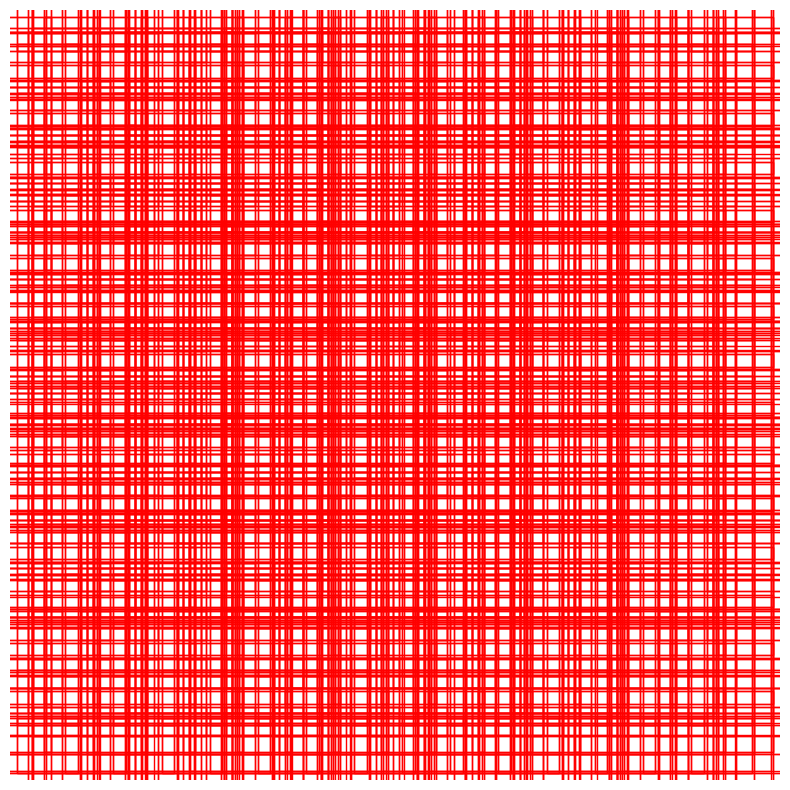

In [109]:
test_image = torch.ones(3, 256, 256)  # Просто белое изображение

# # Размеры карт признаков и аспекты
# image_size = (256, 256)
# feature_map_sizes = [(38, 38), (19, 19), (10, 10), (5, 5), (3, 3), (1, 1)]
# aspect_ratios = [[1, 2, 0.5], [1, 2, 0.5, 3, 1/3], [1, 2, 0.5, 3, 1/3], [1, 2, 0.5, 3, 1/3], [1, 2, 0.5], [1, 2, 0.5]]

# # Генерация боксов
# prior_boxes = generate_prior_boxes(image_size, feature_map_sizes, aspect_ratios)

# Визуализация
print("Так выглядит полное заполенение изображения prior боксами")
visualize_prior_boxes(test_image, prior_boxes.numpy())

CalledProcessError: Command '['ffmpeg', '-f', 'rawvideo', '-vcodec', 'rawvideo', '-s', '1000x1000', '-pix_fmt', 'rgba', '-framerate', '15', '-loglevel', 'error', '-i', 'pipe:', '-vcodec', 'h264', '-pix_fmt', 'yuv420p', '-y', '/content/prior_boxes_animation.mp4']' returned non-zero exit status 255.

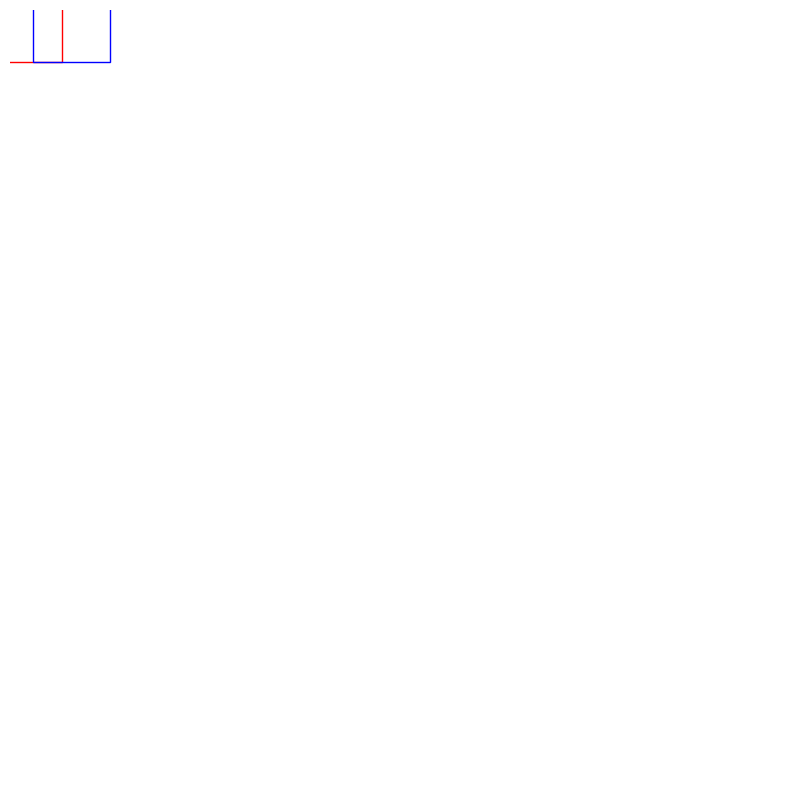

In [110]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.animation import FuncAnimation

def animate_prior_boxes(image, priors, output_path="prior_boxes_animation.mp4", figsize=(10, 10), num_boxes_to_display=1000, interval=200):
    """
    Создание анимации, показывающей поочередную генерацию приор боксов.
    С сохранением анимации в файл.

    :param num_boxes_to_display: количество боксов для отображения
    :param interval: интервал между генерируемыми боксами в анимации
    """
    # Если изображение нормализовано
    if isinstance(image, torch.Tensor):
        image = image.permute(1, 2, 0).cpu().numpy()
    if image.max() > 1:
        image = image / 255.0  # Нормализуем изображение

    # Конвертируем нормализованные координаты в пиксели
    h, w, _ = image.shape
    priors_abs = []
    for cx, cy, w_box, h_box in priors[:num_boxes_to_display]:  # Ограничиваем количество боксов
        xmin = (cx - w_box / 2) * w
        ymin = (cy - h_box / 2) * h
        xmax = (cx + w_box / 2) * w
        ymax = (cy + h_box / 2) * h
        priors_abs.append([xmin, ymin, xmax, ymax])

    # Настройка анимации
    fig, ax = plt.subplots(1, figsize=figsize)
    ax.imshow(image)
    ax.axis('off')

    rects = []

    # Функция для обновления фрейма
    def update(frame):
        # Очистить все боксы
        for rect in rects:
            rect.remove()

        rects.clear()

        # Нарисовать все боксы до текущего (с интервалом)
        for i in range(0, (frame+1) * interval, interval):
            if i >= len(priors_abs):
                break
            xmin, ymin, xmax, ymax = priors_abs[i]
            width = xmax - xmin
            height = ymax - ymin
            rect = patches.Rectangle((xmin, ymin), width, height, linewidth=1, edgecolor='red', facecolor='none')
            ax.add_patch(rect)
            rects.append(rect)

        # Нарисовать последний бокс синим
        last_index = (frame + 1) * interval - 1
        if last_index < len(priors_abs):
            xmin, ymin, xmax, ymax = priors_abs[last_index]
            width = xmax - xmin
            height = ymax - ymin
            rect = patches.Rectangle((xmin, ymin), width, height, linewidth=1, edgecolor='blue', facecolor='none')
            ax.add_patch(rect)
            rects.append(rect)

    # Создание анимации
    ani = FuncAnimation(fig, update, frames=(len(priors_abs) // interval), repeat=False, interval=10)

    # Сохранение анимации в файл
    ani.save(output_path, writer='ffmpeg', fps=15)

# Пример тестового изображения (256x256)
test_image = torch.ones(3, 256, 256)  # Просто белое изображение

# Размеры карт признаков и аспекты
image_size = (256, 256)
# feature_map_sizes = [(38, 38), (19, 19), (10, 10), (5, 5), (3, 3), (1, 1)]
# aspect_ratios = [[1, 2, 0.5], [1, 2, 0.5, 3, 1/3], [1, 2, 0.5, 3, 1/3], [1, 2, 0.5, 3, 1/3], [1, 2, 0.5], [1, 2, 0.5]]
feature_map_sizes = [(32, 32), (16, 16), (8, 8), (4, 4)]
aspect_ratios = [[1, 2, 0.5], [1, 2, 0.5], [1, 2], [1]]

# Генерация боксов
prior_boxes = generate_prior_boxes(image_size, feature_map_sizes, aspect_ratios)

# Визуализация и сохранение анимации с интервалом
output_path = '/content/prior_boxes_animation.mp4'  # Путь к файлу, который будет сохранен в Colab
animate_prior_boxes(test_image, prior_boxes.numpy(), output_path=output_path, num_boxes_to_display=24000, interval=10)  # Ограничиваем до 500 боксов, показываем каждый 200-й

# Скачивание анимации
from google.colab import files
files.download(output_path)


In [ ]:
# # mbox_sizes = [4, 6, 6, 6, 4, 4]
# for i in sources:
#     print(i.shape)

# # умножая 64*64*4 и так для всех получим 24538 приор (без учета последней 1х1), а 24538*4 = 98112 приор

### Переобучение готовой модели

In [31]:
# import torch
# import torchvision
# from torchvision.models.detection import SSDLite320_MobileNet_V3_Large_Weights
# from torchvision.models.detection.ssdlite import SSDLiteClassificationHead

# # 1. Загрузите предобученную модель
# weights = SSDLite320_MobileNet_V3_Large_Weights.DEFAULT
# model = torchvision.models.detection.ssdlite320_mobilenet_v3_large(weights=weights)

# # 2. Определите количество классов (включая background)
# num_classes = 2  # Ваше количество классов + 1 для background

# # 3. Полностью замените head классификации
# # Найдем количество anchor boxes
# num_anchors = model.anchor_generator.num_anchors_per_location()

# # Для MobileNetV3-Large в SSDLite320:
# in_channels = 672  # Количество каналов в последнем слое перед классификатором

# # Создаем новый классификатор
# new_head = SSDLiteClassificationHead(
#     in_channels=[in_channels],  # Список входных каналов для каждого уровня feature map
#     num_anchors=num_anchors,
#     num_classes=num_classes,
#     norm_layer=torch.nn.BatchNorm2d
# )

# # Заменяем классификатор
# model.head.classification_head = new_head

# # 4. Проверяем архитектуру
# print(model.head.classification_head)

In [ ]:
# import torch
# import torchvision
# from torchvision.models.detection import SSDLite320_MobileNet_V3_Large_Weights

# # 1. Инициализация модели с правильными параметрами
# weights = SSDLite320_MobileNet_V3_Large_Weights.DEFAULT
# model = torchvision.models.detection.ssdlite320_mobilenet_v3_large(weights=weights)

# # 2. Проверка архитектуры backbone
# dummy_input = torch.rand(2, 3, 320, 320)  # Batch size=2 важно!
# with torch.no_grad():
#     features = model.backbone(dummy_input)
#     print("Feature shapes:", {k: v.shape for k, v in features.items()})

# # 3. Настройка DataLoader с гарантией правильного размера
# transform = transforms.Compose([
#     transforms.Resize((320, 320)),  # Жестко фиксируем размер
#     transforms.ToTensor(),
#     transforms.Normalize(mean=[0.485, 0.456, 0.406],
#                         std=[0.229, 0.224, 0.225])
# ])

# # 4. Проверка одного батча
# images, targets = next(iter(train_loader))
# print("Batch images shape:", images[0].shape)  # Должно быть torch.Size([3, 320, 320])

# # 5. Фикс для BatchNorm - принудительная установка режима
# model.train()  # Важно перед обучением
# for m in model.modules():
#     if isinstance(m, torch.nn.BatchNorm2d):
#         m.track_running_stats = True
#         m.momentum = 0.1  # Стандартное значение

Feature shapes: {'0': torch.Size([2, 672, 20, 20]), '1': torch.Size([2, 480, 10, 10]), '2': torch.Size([2, 512, 5, 5]), '3': torch.Size([2, 256, 3, 3]), '4': torch.Size([2, 256, 2, 2]), '5': torch.Size([2, 128, 1, 1])}
Batch images shape: torch.Size([3, 256, 256])


In [ ]:
# def convert_yolo_to_ssd(target, img_width=320, img_height=320):
#     boxes = []
#     labels = []

#     for obj in target:
#         if len(obj) < 5:
#             continue

#         class_id = int(obj[0])
#         x_center, y_center, w, h = obj[1:5]

#         # Гарантируем валидные значения
#         x_center = max(0.001, min(0.999, x_center))
#         y_center = max(0.001, min(0.999, y_center))
#         w = max(0.002, min(1.0, w))  # Минимум 2px при 320x320
#         h = max(0.002, min(1.0, h))

#         # Конвертация в абсолютные координаты
#         xmin = max(0, (x_center - w/2) * img_width)
#         ymin = max(0, (y_center - h/2) * img_height)
#         xmax = min(img_width, (x_center + w/2) * img_width)
#         ymax = min(img_height, (y_center + h/2) * img_height)

#         # Гарантируем минимальный размер
#         if xmax - xmin < 1 or ymax - ymin < 1:
#             continue

#         boxes.append([xmin, ymin, xmax, ymax])
#         labels.append(class_id + 1)  # +1 для background

#     if len(boxes) == 0:
#         return {
#             'boxes': torch.zeros((0, 4), dtype=torch.float32),
#             'labels': torch.zeros(0, dtype=torch.int64)
#         }
#     return {
#         'boxes': torch.tensor(boxes, dtype=torch.float32),
#         'labels': torch.tensor(labels, dtype=torch.int64)
#     }

In [ ]:
# def collate_fn_ssd(batch):
#     images = []
#     targets = []

#     for image, yolo_target in batch:
#         images.append(image)
#         target = convert_yolo_to_ssd(yolo_target)

#         # Гарантируем что тензоры на CPU перед созданием DataLoader
#         target['boxes'] = target['boxes'].cpu()
#         target['labels'] = target['labels'].cpu()
#         targets.append(target)

#     return images, targets

In [ ]:
# from torchvision.models.detection import SSDLite320_MobileNet_V3_Large_Weights
# from torchvision.models.detection.ssdlite import SSDLiteClassificationHead

# # Инициализация модели с правильными параметрами
# weights = SSDLite320_MobileNet_V3_Large_Weights.DEFAULT
# model = torchvision.models.detection.ssdlite320_mobilenet_v3_large(weights=weights)

# # Замена head с гарантией соответствия размерностей
# num_classes = 2  # Ваше количество классов + background
# model.head.classification_head = SSDLiteClassificationHead(
#     in_channels=[672, 480, 512, 256, 256, 128],
#     num_anchors=[4, 6, 6, 6, 4, 4],
#     num_classes=num_classes,
#     norm_layer=torch.nn.BatchNorm2d
# )

In [ ]:
# train_loader = DataLoader(data_tr, batch_size=batch_size, shuffle=True, collate_fn=collate_fn_ssd, pin_memory=True)
# val_loader = DataLoader(data_val, batch_size=batch_size, shuffle=False, collate_fn=collate_fn_ssd, pin_memory=True)
# test_loader = DataLoader(data_test, batch_size=batch_size, shuffle=False, collate_fn=collate_fn_ssd, pin_memory=True)

In [ ]:
# import torch.optim as optim
# from torch.optim.lr_scheduler import StepLR

# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# model.to(device)

# # Замораживаем backbone для transfer learning
# for param in model.backbone.parameters():
#     param.requires_grad = False

# # Оптимизатор только для головы
# optimizer = optim.SGD(model.head.parameters(), lr=0.005, momentum=0.9, weight_decay=0.0005)
# scheduler = StepLR(optimizer, step_size=3, gamma=0.1)

# # Функция для обучения
# def train_one_epoch(model, optimizer, data_loader, device):
#     model.train()
#     total_loss = 0

#     for images, targets in data_loader:
#         # Проверка размерностей перед передачей в модель
#         try:
#             images = list(img.to(device) for img in images)
#             targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

#             loss_dict = model(images, targets)
#             losses = sum(loss for loss in loss_dict.values())

#             optimizer.zero_grad()
#             losses.backward()
#             optimizer.step()

#             total_loss += losses.item()
#         except Exception as e:
#             print(f"Skipping batch due to error: {e}")
#             continue

#     return total_loss / len(data_loader)

# # Функция для валидации
# def evaluate(model, data_loader, device):
#     model.eval()
#     total_loss = 0

#     with torch.no_grad():
#         for images, targets in data_loader:
#             images = list(image.to(device) for image in images)
#             targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

#             loss_dict = model(images, targets)
#             losses = sum(loss for loss in loss_dict.values())
#             total_loss += losses.item()

#     return total_loss / len(data_loader)

In [ ]:
# # Проверка anchor boxes
# print("Anchor generator:", model.anchor_generator)
# print("Number of anchors per feature map:",
#       model.anchor_generator.num_anchors_per_location())

# # Должно вывести что-то вроде:
# # [4, 6, 6, 6, 4, 4] для SSDlite320

Anchor generator: DefaultBoxGenerator(aspect_ratios=[[2, 3], [2, 3], [2, 3], [2, 3], [2, 3], [2, 3]], clip=True, scales=[0.2, 0.35, 0.5, 0.65, 0.8, 0.95, 1.0], steps=None)
Number of anchors per feature map: [6, 6, 6, 6, 6, 6]


Анализ параметров Anchor Generator:
aspect_ratios=[[2, 3], ..., [2, 3]]:

Для каждого уровня feature map используются 2 соотношения сторон: 2:1 и 3:1

Плюс всегда добавляется "квадратный" anchor (1:1)

Итого 3 anchor box на каждую точку feature map (2 соотношения + 1 квадратный)

scales=[0.2, 0.35, 0.5, 0.65, 0.8, 0.95, 1.0]:

Масштабы anchor boxes распределены по уровням feature pyramid

Каждый уровень получает 2 соседних масштаба (например, 0.2 и 0.35 для первого уровня)

num_anchors_per_location() = [6, 6, 6, 6, 6, 6]:

На каждом из 6 уровней feature pyramid генерируется по 6 anchor boxes в каждой точке

Рассчитывается как: 3 aspect_ratios * 2 scales = 6

In [ ]:
# num_epochs = 10
# best_val_loss = float('inf')

# for epoch in range(num_epochs):
#     train_loss = train_one_epoch(model, optimizer, train_loader, device)
#     val_loss = evaluate(model, val_loader, device)
#     scheduler.step()

#     print(f"Epoch {epoch+1}/{num_epochs}")
#     print(f"Train loss: {train_loss:.4f}, Val loss: {val_loss:.4f}")

#     # Сохраняем лучшую модель
#     if val_loss < best_val_loss:
#         best_val_loss = val_loss
#         torch.save(model.state_dict(), 'best_model.pth')
#         print("Model saved!")

Skipping batch due to error: index 2818 is out of bounds for dimension 0 with size 2424
Skipping batch due to error: index 2638 is out of bounds for dimension 0 with size 2424
Skipping batch due to error: index 2546 is out of bounds for dimension 0 with size 2424
Skipping batch due to error: index 2505 is out of bounds for dimension 0 with size 2424


KeyboardInterrupt: 

In [ ]:
# # Проверка параметров anchor generator
# print("Anchor scales:", model.anchor_generator.scales)
# print("Aspect ratios:", model.anchor_generator.aspect_ratios)
# print("Number of anchors per level:", model.anchor_generator.num_anchors_per_location())

# # Проверка выходов backbone
# dummy_input = torch.rand(1, 3, 320, 320)
# with torch.no_grad():
#     features = model.backbone(dummy_input)
#     print("Feature shapes:", {k: v.shape for k, v in features.items()})

Anchor scales: [0.2, 0.35, 0.5, 0.65, 0.8, 0.95, 1.0]
Aspect ratios: [[2, 3], [2, 3], [2, 3], [2, 3], [2, 3], [2, 3]]
Number of anchors per level: [6, 6, 6, 6, 6, 6]


ValueError: Expected more than 1 value per channel when training, got input size torch.Size([1, 64, 1, 1])

In [ ]:
# # После инициализации модели
# dummy_input = torch.rand(1, 3, 320, 320).to(device)
# with torch.no_grad():
#     features = model.backbone(dummy_input)
#     anchors = model.anchor_generator(features)
#     print("Total anchors:", sum(a.shape[1] for a in anchors))

ValueError: Expected more than 1 value per channel when training, got input size torch.Size([1, 64, 1, 1])

### Попытка трансферлернинга на предобученной нейросети (COCO 80 классов)

In [ ]:
import torchvision
from torchvision.models.detection import SSDLite320_MobileNet_V3_Large_Weights

# Загрузка предобученной модели
model = torchvision.models.detection.ssdlite320_mobilenet_v3_large(
    weights=SSDLite320_MobileNet_V3_Large_Weights.DEFAULT
)
model.eval()  # Переводим в режим инференса

print(" :) чтоб модель не выводилась")

 :) чтоб модель не выводилась


### Обучение

In [344]:
# количество приоров
# num_priors = 24528
# num_priors = 17464
num_priors = 2264

In [345]:
import matplotlib.pyplot as plt
from tqdm import tqdm

def visualize_metrics(epoch_losses):
    """
    Визуализация графика IoU Loss для каждой эпохи.

    Args:
        epoch_losses (list): Список значений IoU Loss для каждой эпохи.
    """
    epochs = range(1, len(epoch_losses) + 1)

    plt.figure(figsize=(8, 6))
    plt.plot(epochs, epoch_losses, label="IoU Loss", color="red", marker="o")
    plt.title("IoU Loss over Epochs", fontsize=14)
    plt.xlabel("Epoch", fontsize=12)
    plt.ylabel("IoU Loss", fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(True)
    plt.show()

In [346]:
def train(model, opt, loss_fn, epochs, data_tr, data_val):
    """
    Функция для обучения модели с визуализацией метрик и прогресс-баром.

    Args:
        model: Обучаемая модель.
        opt: Оптимизатор.
        loss_fn: Функция потерь.
        epochs (int): Количество эпох.
        data_tr: Тренировочный DataLoader.
        data_val: Валидационный DataLoader.
    """
    # Создание scheduler
    scheduler = torch.optim.lr_scheduler.StepLR(opt, step_size=30, gamma=0.1)

    # Хранилище для метрик
    epoch_IOU_losses = []

    for epoch in range(epochs):
        model.train()
        total_loss = 0.0
        total_iou = 0.0

        # Добавление прогресс-бара
        progress_bar = tqdm(data_tr, desc=f"Epoch {epoch+1}/{epochs}", unit="batch")

        for batch in progress_bar:
            # Распаковка пакета данных
            batch_images, batch_boxes = batch

            if torch.cuda.is_available():
                batch_images = batch_images.cuda()
                batch_boxes = batch_boxes.cuda()

            # Обнуление градиентов
            opt.zero_grad()

            # Прямой проход модели
            outputs = model(batch_images)
            print("outputs: ", type(outputs), len(outputs[0]), len(outputs[1]))

            # Расчет функции потерь
            loss = loss_fn(outputs, batch_boxes)  # Предполагается, что loss_fn возвращает (total_loss, iou_loss)


            # Обратный проход и оптимизация
            loss.backward()
            opt.step()

            # Обновление метрик
            total_loss += loss.item()
            # total_iou += iou_loss.item()

            # Обновление прогресс-бара
            progress_bar.set_postfix({"Loss": loss.item()})

        # Средние значения для эпохи
        avg_loss = total_loss / len(data_tr)
        # avg_iou = total_iou / len(data_tr)

        # Применение scheduler
        scheduler.step()

        # Сохранение метрик для визуализации
        # epoch_losses.append(1 - avg_iou)  # IoU Loss = 1 - IoU
        # epoch_ious.append(avg_iou)
        epoch_IOU_losses.append(avg_loss)

        # Вывод результатов
        print(f"Epoch [{epoch+1}/{epochs}], Total Loss: {avg_loss:.4f}")

        # Визуализация метрик
        visualize_metrics(epoch_IOU_losses)


In [327]:
# очистка памяти
import gc
gc.collect()

198294

In [347]:
# Перемещение модели на устройство (если доступно)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model=SSD(num_classes=2, prior_boxes=prior_boxes).to(device)

In [348]:
epochs = 30

# Создание оптимизатора
optimizer = torch.optim.Adam(model.parameters(), lr=1*10e-5)

# Создание функции потерь
loss_fn = SSDLoss(num_classes=2, prior_boxes=prior_boxes)

In [259]:
# optimizer.zero_grad()

In [260]:
# Очистка кэша GPU
# torch.cuda.empty_cache()

In [261]:
# Принудительное завершение всех потоков
# torch.cuda.synchronize()

<ipython-input-304-d5dc212e08bb>:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  padded_targets[i, :end] = torch.tensor(target)


Пример координат первого бокса: tensor([0.0000, 0.6328, 0.1244, 0.6914, 0.2122])


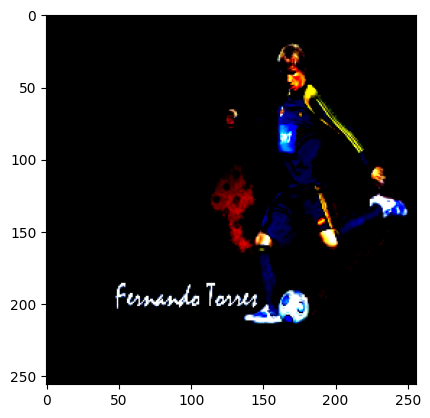

In [349]:
# Для одного батча
images, targets = next(iter(train_loader))
print("Пример координат первого бокса:", targets[0][0])  # Должно быть [x1,y1,x2,y2,class_id]

# Визуализируем
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.imshow(images[0].permute(1,2,0))  # CHW -> HWC
for box in targets[0]:
    x1,y1,x2,y2 = box[:4]
    rect = plt.Rectangle((x1,y1), x2-x1, y2-y1, fill=False, color='red')
    ax.add_patch(rect)
plt.show()

In [350]:
# Вызов функции train
train(model, optimizer, loss_fn, epochs, train_loader, val_loader)

Epoch 1/30:   0%|          | 0/81 [00:00<?, ?batch/s]<ipython-input-304-d5dc212e08bb>:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  padded_targets[i, :end] = torch.tensor(target)
Epoch 1/30:   1%|          | 1/81 [00:00<01:08,  1.16batch/s, Loss=0]

outputs:  <class 'tuple'> 8 8
Invalid boxes: x2 <= x1 or y2 <= y1
Invalid boxes: x2 <= x1 or y2 <= y1
Invalid boxes: x2 <= x1 or y2 <= y1
Invalid boxes: x2 <= x1 or y2 <= y1
Invalid boxes: x2 <= x1 or y2 <= y1
Invalid boxes: x2 <= x1 or y2 <= y1
Invalid boxes: x2 <= x1 or y2 <= y1


Epoch 1/30:   2%|▏         | 2/81 [00:02<01:24,  1.07s/batch, Loss=0]

outputs:  <class 'tuple'> 8 8
Invalid boxes: x2 <= x1 or y2 <= y1
Invalid boxes: x2 <= x1 or y2 <= y1
Invalid boxes: x2 <= x1 or y2 <= y1
Invalid boxes: x2 <= x1 or y2 <= y1
Invalid boxes: x2 <= x1 or y2 <= y1
Invalid boxes: x2 <= x1 or y2 <= y1
Invalid boxes: x2 <= x1 or y2 <= y1


Epoch 1/30:   4%|▎         | 3/81 [00:03<01:30,  1.15s/batch, Loss=0]

outputs:  <class 'tuple'> 8 8
Invalid boxes: x2 <= x1 or y2 <= y1
Invalid boxes: x2 <= x1 or y2 <= y1
Invalid boxes: x2 <= x1 or y2 <= y1
Invalid boxes: x2 <= x1 or y2 <= y1
Invalid boxes: x2 <= x1 or y2 <= y1
Invalid boxes: x2 <= x1 or y2 <= y1
Invalid boxes: x2 <= x1 or y2 <= y1


Epoch 1/30:   5%|▍         | 4/81 [00:04<01:31,  1.19s/batch, Loss=0]

outputs:  <class 'tuple'> 8 8
Invalid boxes: x2 <= x1 or y2 <= y1
Invalid boxes: x2 <= x1 or y2 <= y1
Invalid boxes: x2 <= x1 or y2 <= y1
Invalid boxes: x2 <= x1 or y2 <= y1
Invalid boxes: x2 <= x1 or y2 <= y1
Invalid boxes: x2 <= x1 or y2 <= y1
Invalid boxes: x2 <= x1 or y2 <= y1


Epoch 1/30:   5%|▍         | 4/81 [00:05<01:36,  1.26s/batch, Loss=0]


KeyboardInterrupt: 

In [351]:
def inspect_batch(batch):
    images, targets = batch
    print(f"Batch size: {len(images)}")
    print(f"Image tensor shape: {images.shape}")

    for i, target in enumerate(targets):
        print(f"\nSample {i}:")
        print(f"Number of boxes: {len(target)}")
        if len(target) > 0:
            print("Box coordinates (x1,y1,x2,y2):")
            print(target[:, 1:5])

            # Проверка валидности
            invalid = (target[:, 3] <= target[:, 1]) | (target[:, 4] <= target[:, 2])
            if invalid.any():
                print(f"Invalid boxes found: {invalid.sum().item()}")

# Проверяем первый батч
batch = next(iter(train_loader))
inspect_batch(batch)

Batch size: 8
Image tensor shape: torch.Size([8, 3, 256, 256])

Sample 0:
Number of boxes: 97
Box coordinates (x1,y1,x2,y2):
tensor([[0.1523, 0.1405, 0.2871, 0.3558],
        [0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.

<ipython-input-304-d5dc212e08bb>:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  padded_targets[i, :end] = torch.tensor(target)


In [ ]:
# сохранение весов модели:
torch.save(model.state_dict(), "model_weights.pth")

In [ ]:
def save_model(model, optimizer, epoch, loss, filepath):
    # Создание словаря с состояниями
    checkpoint = {
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'epoch': epoch,
        'loss': loss
    }
    # Сохранение в файл
    torch.save(checkpoint, filepath)
    print(f"Модель сохранена в: {filepath}")

In [ ]:
# Сохранение модели
save_path = 'model_checkpoint1.pth'
save_model(model, optimizer, epoch=5, loss=0.123, filepath=save_path)

In [ ]:
sources.clear()

In [ ]:
def load_model(filepath, model, optimizer=None):
    """
    Загрузка модели и оптимизатора из файла.

    Args:
        filepath (str): Путь к файлу сохраненной модели.
        model: Экземпляр модели, которую нужно восстановить.
        optimizer: Экземпляр оптимизатора (если требуется восстановить).

    Returns:
        dict: Чекпоинт с информацией о модели, оптимизаторе, эпохе и loss.
    """
    # Загрузка чекпоинта
    checkpoint = torch.load(filepath, map_location=torch.device('cuda' if torch.cuda.is_available() else 'cpu'))

    # Загрузка состояния модели
    model.load_state_dict(checkpoint['model_state_dict'], strict=False)

    # Если передан оптимизатор, загрузим его состояние
    if optimizer:
        optimizer.load_state_dict(checkpoint['optimizer_state_dict'])

    print(f"Модель успешно загружена с: {filepath}")
    return checkpoint

In [ ]:
# Загрузка модели
model = SSD(num_classes=2, prior_boxes=prior_boxes).to(device)


# Путь к сохраненной модели
save_path = 'model_checkpoint1.pth'

# Загрузка модели и оптимизатора
checkpoint = load_model(save_path, model, optimizer)

# Извлекаем информацию о последней эпохе и loss
last_epoch = checkpoint['epoch']
last_loss = checkpoint['loss']

# Переводим модель в режим оценки
model.eval()

print(f"Последняя эпоха: {last_epoch}, Loss: {last_loss}")

In [ ]:
import torch
from tqdm import tqdm
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
from torchvision import transforms

# Нормализация (mean и std для модели, использующей ImageNet)
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

# Обратная нормализация для отображения изображения
unnormalize = transforms.Normalize(
    mean=[-m / s for m, s in zip(mean, std)],
    std=[1.0 / s for s in std]
)

def convert_to_pixel_coordinates(box, image_width, image_height):
    """
    Конвертирует координаты бокса из нормализованного формата (x_center, y_center, width, height)
    в абсолютные пиксели (x_min, y_min, x_max, y_max).
    """
    x_center, y_center, width, height = box
    x_min = (x_center - width / 2) * image_width
    y_min = (y_center - height / 2) * image_height
    x_max = (x_center + width / 2) * image_width
    y_max = (y_center + height / 2) * image_height
    return x_min, y_min, x_max, y_max

def process_and_visualize(val_loader, model, device, num_images=100, conf_threshold=0.5):
    """
    Прогоняет изображения через модель, визуализирует результаты с предсказанными боксами.

    Args:
        val_loader (DataLoader): Валидаторный DataLoader.
        model: Обученная модель.
        device: Устройство (CPU или CUDA).
        num_images (int): Количество изображений для обработки.
        conf_threshold (float): Порог уверенности для отображения боксов.
    """
    model.eval()  # Переводим модель в режим оценки
    processed_images = 0

    with torch.no_grad():
        for batch in tqdm(val_loader, desc="Processing Images"):
            # Извлечение данных из пакета
            batch_images, _ = batch  # Предполагается, что DataLoader возвращает (image, label)

            if device:
                batch_images = batch_images.to(device)

            # Прогоняем пакет через модель
            transformed_locs, transformed_confs = model(batch_images)

            # Преобразуем в numpy для работы с изображениями
            transformed_locs = transformed_locs.cpu().numpy()  # Координаты боксов
            transformed_confs = transformed_confs.cpu().numpy()  # Оценки вероятностей

            # Для каждого изображения в батче
            for i, image_tensor in enumerate(batch_images):
                if processed_images >= num_images:
                    return

                # Обратная нормализация для получения исходных значений пикселей
                image_tensor = unnormalize(image_tensor)

                # Преобразование тензора изображения в формат для PIL
                image_array = (image_tensor.permute(1, 2, 0).cpu().numpy() * 255).astype('uint8')
                image = Image.fromarray(image_array)
                image_width, image_height = image.size

                # Создание объекта для рисования
                draw = ImageDraw.Draw(image)

                # Извлечение предсказанных координат боксов и оценок уверенности
                pred_boxes = transformed_locs[i]  # Координаты боксов
                pred_scores = transformed_confs[i]  # Оценки вероятностей

                # Если это многоклассовая модель, выбираем максимальное значение
                pred_scores = pred_scores.max(axis=1)  # Оставляем максимальную оценку для каждого бокса

                # Применение порога уверенности
                keep = pred_scores >= conf_threshold

                if len(keep.shape) == 1:  # Если keep одномерный (по боксам)
                    filtered_boxes = pred_boxes[keep]  # Фильтруем только те боксы, которые прошли порог

                    # Конвертация нормализованных координат в пиксели
                    pixel_boxes = [
                        convert_to_pixel_coordinates(box, image_width, image_height)
                        for box in filtered_boxes
                    ]

                    # Считаем количество боксов, которые будут нарисованы
                    num_boxes = len(pixel_boxes)
                    print(f"Image {processed_images + 1}: {num_boxes} bounding boxes detected")

                    # Рисование боксов на изображении
                    for box in pixel_boxes:
                        left, top, right, bottom = box
                        draw.rectangle([left, top, right, bottom], outline='red', width=3)

                else:
                    print(f"No boxes passed the confidence threshold for Image {processed_images + 1}")

                # Отображение изображения с предсказаниями
                plt.figure(figsize=(8, 8))
                plt.imshow(image)
                plt.axis('off')
                plt.show()

                processed_images += 1


Processing Images:   0%|          | 0/966 [00:00<?, ?it/s]

Image 1: 0 bounding boxes detected


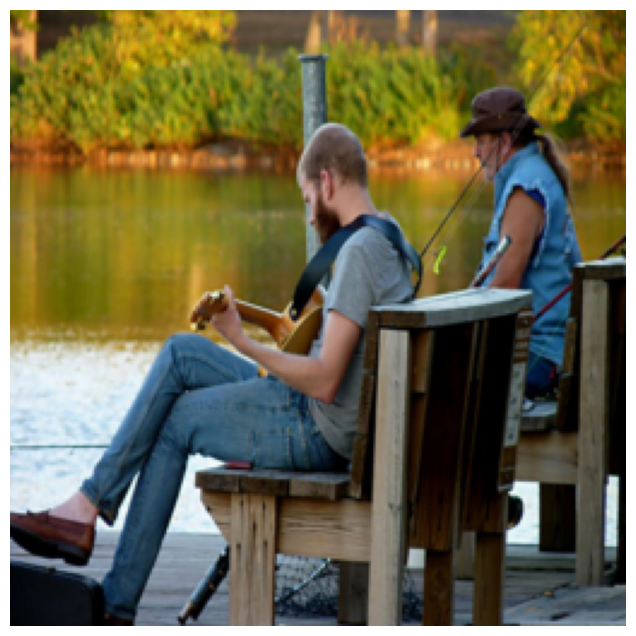

Image 2: 0 bounding boxes detected


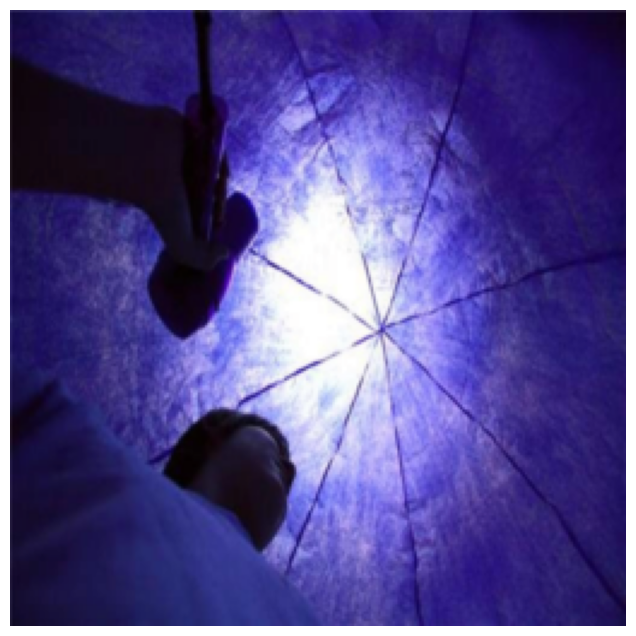

Processing Images:   0%|          | 0/966 [00:01<?, ?it/s]


In [ ]:
process_and_visualize(val_loader, model, device, num_images=2, conf_threshold=0.3)

> Результатом выполнения пункта явлется код, запуск которого ведет к обучению модели на выбранном датасете. При обучении **обязательно выводить числовые значения лосса на трейне и валидации**, крайне желательно использовать [`TensorBoard`](https://pytorch.org/docs/stable/tensorboard.html) для визуализации. Обязательно также сохранять модель после каждой N-ой эпохи, чтобы потом ее качество можно было проверить и веса были переиспользуемыми.

### 6. Измерение качества работы модели (метрики согласуются с руководителем и зависят от задачи) (2 балла)

Под метриками понимаются функции/формулы, по которым оценивается качество модели-детектора. Обычно для измерения качества работы детектора используют поклассовые Precision, Recall, F1-меру и mean Average Precision (mAP). Подробнее про них можно послушать в [видеолекции 2018 года](https://www.youtube.com/watch?v=ewkSI2cuyoQ&list=PL0Ks75aof3ThkitsZbUOEQg7Ybl5kB_s3&index=24).

**Необходимо самостоятельно реализовать требуемые метрики!**

> Результат пункта --- реализованные функции метрик для задачи детектирования, позволяющие оценить качество работы модели на выборке, а также оценка обеих обученных моделей по данным метрикам на test. Необходимо сделать вывод о том, какая модель сработала лучше и оценить полученный результат.

### 7. Поиск путей применения этой модели в бизнесе/реальных задачах/набросок встраивания в веб/мобильное демо (1 балл)

В этом пункте нужно подумать, как эта модель может быть использована в дальнейшем. То есть, например, зачем нужно детектировать фрукты? Или одежду?

> Результат пункта $-$ перечисленные кейсы использования модели (описанные **как можно подробнее**).

**IMPORTANT NOTE:** Обычно этим вопросом все же задаются до начала какой-либо разработки. Но поскольку проект носит учебный/исследовательский характер, допустимо говорить об этом в конце

# Продуктовый трек

На этом треке вам не понадобится обучать свою модель детекции (хотя никто не запрещает вам это делать), но необходимо, во-первых, продумать **продуктовую составляющую проекта** (проблема людей, которая решается в данном проекте, целевая аудитория продукта, оптимальный способ внедрения модели), а также создать [MVP](https://ru.wikipedia.org/wiki/%D0%9C%D0%B8%D0%BD%D0%B8%D0%BC%D0%B0%D0%BB%D1%8C%D0%BD%D0%BE_%D0%B6%D0%B8%D0%B7%D0%BD%D0%B5%D1%81%D0%BF%D0%BE%D1%81%D0%BE%D0%B1%D0%BD%D1%8B%D0%B9_%D0%BF%D1%80%D0%BE%D0%B4%D1%83%D0%BA%D1%82) , **внедрив модель детекции в цифровой сервис**, который может быть реализован как Telegram-бот, Web-демо, Desktop-приложение.

Ваша модель не обязательно должна содержать в себе лишь детекцию: например, существуют составные модели, которые осуществляют детекцию лиц на фотографии и определяют их настроение/возраст. Такие модели тоже можно и даже желательно использовать, если того требует проект. Единственное требование --- чтобы детекция присутствовала в качестве основной/вспомогательной задачи.

Если у Вас есть опыт веб- или мобильной разработки, можете работать в рамках привычных Вам инструментов. Главное, чтобы в итоге они позволяил встроить в себя нейросетевой детектор, на вход которому будут поступать картинки.

Изображения на вход демо могут поступать с веб-камеры, из файлов, по ссылке или с камеры мобильного телефона -- способ должен вытекать из предполагаемого сценария применения вашего продукта. Демо должно показывать, что детектор успешно отрабатывает на поданных изображениях и находит нужные объекты.

## План работы

### 1. Поиск проблемы и описание решения (2 балла)
В этом пункте необходимо сформулировать проблему реального мира и продумать, как именно она будет решаться с помощью вашего продукта.

#### Как должен быть устроен ваш продукт
Здесь мы не будем подробно обсуждать, как создавать IT-продукты, которые будут пользоваться широким спросом и способны генерировать выручку. Но кратко опишем!

1. **Ваш продукт должен решать существующую проблему**. Исследования показывают, что это основная причина провала стартапов --- решение не существующей проблемы. О том, как создать стартап, который решает реальную проблему пользователя, можно прочитать [здесь](https://stfalcon.com/ru/blog/post/startups-solving-user-problems). Также есть отличная книжка "Спроси маму", которую необходимо прочитать любому человеку, который создает свой продукт.

2. **Ваш продукт должен иметь целевую аудиторию**. Этот пункт увязан с предыдущим. Если у продукта нет целевой аудитории, его никто не будет использовать.

3. **Ваш продукт должен быть оформлен в сервис, подходящий для основного сценария использования продукта и целевой аудитории**. Предположим, например, что вы делаете цифровой сервис для распознавания языка жестов. Как может выглядеть такой продукт и в какой сервис он может быть внедрён? Например, если создать ТГ-бота, который будет детектировать и распознавать жест по фотографии, его довольно сложно будет использовать, потому что каждый жест в отдельности сфотографировать нельзя. Оптимальным решением в этом случае было бы мобильное приложение с потоковым детектированием жеста на видео и автоматическим добавлением субтитров. При этом именно такой продукт может быть слишком сложен в реализации. Тогда необходимо выбрать оформление сервиса, которое будет осмысленно с продуктовой точки зрения и которое вы при этом сможете реализовать.

#### Как искать проблему
Есть много способов найти важную и актуальную проблему. Некоторые советы перечислены в книге "Спроси маму". Несколько коротких советов можно найти [здесь](https://vc.ru/life/1735-startup-ideas).
* Можно подумать о темах, которые близки лично вам/вашим знакомым. Если проект решает проблему даже узкой целевой аудитории, это не страшно.
* Можно найти уже существующий проект и улучшить его, обозначив, в чем преимущество вашего решения перед конкурентами.
* У человечества вообще много глобальных [проблем](https://www.un.org/sustainabledevelopment/ru/sustainable-development-goals/), над которыми борются различные мировые организации. Если ваш проект способен хоть в каком-то частном случае продвинуться к решению этих проблем, это уже будет отлично.
* Для поиска идей можно использовать датасеты с kaggle.

> Результат пункта -- подробное описание проблемы, которую вы решаете, целевая аудитория использования продукта, а также **подробное** описание сервиса, который предлагается создать. Допускается описать "идеальный продукт", а затем создать MVP, имеющий отклонения от оптимального варианта, сославшись на ограниченное время/ресурсы для выполнения проекта. Но тогда это необходимо отдельно упомянуть в этом пункте.

### 2. Поиск обученной модели и датасета (1 балл)

В этом пункте вам необходимо выбрать модель, которую вы встроите в ваш продукт, и датасет, на котором вы эту модель будете тестировать.

* Если вы найдете готовую модель, которую можно применить для вашей задачи, можно просто взять её. В этом случае с датасетом можно особо не заморачиваться. Достаточно в этом пункте запустить ваш детектор на нескольких (5-7) изображениях, на которых модель будет в итоге применяться, и проверить, что модель на них хорошо работает.


### Бонус. 2.5. Обучение модели для вашей задачи (5 баллов)
**За этот пункт ставятся бонусные баллы. Он не является обязательным.**

Если готовой обученной модели вы не смогли найти, тогда необходимо будет обучить модель самостоятельно. В таком случае перед выполнением пункта 2 вам необходимо будет найти подходящий датасет и обучить любую модель детекции с помощью встроенных методов из фреймворков, описанных в первом сценарии:
- `torchvision.models.detection` и `torchhub`: "нативные" модели для детектирования прямо из PyTorch. Примеры использования есть прямо на занятиях DLSchool по практике CV [2019 года](https://www.youtube.com/watch?v=XSPYe4-y4HE) и [2020 года](https://stepik.org/lesson/458313/step/1?unit=616131);
- `mmdetection`: как с ним работать, рассказывается в [практическом занятии](https://stepik.org/lesson/458313/step/2?unit=616131).
- `detectron2`: краткая информация есть в конце [занятия DLSchool по практике CV](https://www.youtube.com/watch?v=XSPYe4-y4HE), можно начать с него. Лучше самостоятелньо изучить [официальный репозиторий](https://github.com/facebookresearch/detectron2) и уже с ним работать в дальнейшем ("Quick Start");
- `TensorFlow Object Detection API`: как с ним работать рассказывается в [занятии 2018 года](https://www.youtube.com/watch?v=xHIzyrU1uVM). Работать предстоит с [официальным репозиторием](https://github.com/tensorflow/models/tree/master/research/object_detection).

После обучения модель нужно будет протестировать на real-world изображениях, на которых планируется использовать продукт.

### 3. Выбор фреймворка/библиотеки для разработки веб/мобильного демо (0 баллов)

Основным инструментом для разработки веб-демо будет микрофреймворк **Flask**: [серия туториалов на русском](https://habr.com/ru/post/346306/).   
Полезные ресуры:
- [курс по веб-разработке](https://www.youtube.com/playlist?list=PLzQrZe3EemP5KsgWGnmC0QrOzQqjg3Kd5), нас интересуют первые 7 видео в плейлисте. В частности, нужны видео по Flask, там очень хорошие обучалки параллельно с лектором;
- [исчерпывающий справочник по Flask (англ)](https://www3.ntu.edu.sg/home/ehchua/programming/webprogramming/Python3_Flask.html);
- можно посмотреть мой [репозиторий с реализацией веб-демо](https://github.com/izaharkin/Respalyzer) для ML-задачи оценки отзывов.

Для разработки мобильного демо стоит выбрать инстурмент на свое усмотрение:
- под Android: [пример на Pytorch Mobile](https://towardsdatascience.com/object-detector-android-app-using-pytorch-mobile-neural-network-407c419b56cd), [пример на TensorFlow Lite](https://www.tensorflow.org/lite/models/object_detection/overview). **Примечание** от Дмитрия Шумилина: на Android с TF Lite на момент января 2021 есть [ошибка](https://github.com/tensorflow/models/issues/9341) с новым форматом хранения модели. Можно попробовать возможное [решение](https://www.youtube.com/watch?v=syTKGY-H44E&ab_channel=DoomsdayRobotics) или писать на чистом Java. Также можно попробовать использовать более старые версии TensorFlow, в которых проблем совместимости еще не было, например, [v2.1.0](https://github.com/tensorflow/tensorflow/releases/tag/v2.1.0).
- под iOS: [пример на TensorFlow Lite Swift API](https://www.tensorflow.org/lite/guide/inference#load_and_run_a_model_in_swift), [пример с Vision Framework](https://developer.apple.com/documentation/vision/recognizing_objects_in_live_capture) на "чистом" Swift'е.

Разумеется, лучше **самостоятельно поискать видео/статьи** на тему использования моделей на мобильных устройствах.

> Результатом пункта является зафисированный для вас инструмент для разработки демо.

### 4. Разработка демо (3 балла)

Этот пункт про сам процесс написания кода для демо.

> Результатом пункта является код, который можно запустить. Не хватать будет только логики детектора, сам интерфейс должен быть уже рабочим.

### 5. Встраивание модели-детектора в демо (2 балла)

Этот пункт про процесс дописывания кода, который будет обеспечивать "логику" демо $-$ само детектирование.

> Результатом пункта является код, который можно запустить и продемонстрировать работающую систему детектирования объектов.

### 6. Тестирование демо (1 балл)

Здесь нужно запустить ваше демо на как можно большем количестве примеров, чтобы понять, в чем его сильные и слабые стороны. То есть какие объекты/сцены детектор обрабатывает легко, а с какими ему справится сложно. Нужно предложить также пути для улучшения модели на основе увиденных ошибок.

> Результатом пункта является набор изображений, на которых демо отработало. Для каждого изображения нужно добавить комментарии, почему модель справилась хорошо/плохо, предложить пути ее улучшения.

### 7. Улучшение дизайна / Развертывание демо на сервере (1 балл)

В этом пункте можно пойти двумя путями:
1. Проделать работу по улучшению визуальной составляющей демо (интерфейс)
2. Загрузить модель на какой-нибудь сервер/хост/test-flight (в случае мобильного iOS-демо), чтобы к демо можно было обратиться прямо в адресной строке браузера / найти в Telegram

\> По *первому пункту* могу посоветовать использовать библиотеку [Bootstrap](https://habr.com/ru/post/349060/), для мобильного демо элементы UI/UX являются частью основной разработки (поэтому стоит просто погуглить/почитать документацию).

\> *Второй пункт - в случае веб-демо*:

Способ 1: Google Cloud Engine.

Если ваше приложение требует установки системных пакетов, например, через `apt-get install`, то вам придется работать на выделенном сервере VPN или на виртуальной машине. К счастью тот же [Google Cloud](https://cloud.google.com/compute) предоставляет бесплатные 300$ на 90 дней использования Виртуальной машиной, чего хватит в большинстве случаев. Эти ссылки помогут вам понять, как в таком случае создать виртуальную машину, установить и настроить виртуальное окружение и вебсервер, а также задеплоить проект:

- [Deploying a Flask app to a Virtual Machine](https://www.youtube.com/watch?v=a2g9pDleGQk&ab_channel=JulianNash)
- [Set up Gunicorn and Nginx](https://www.digitalocean.com/community/tutorials/how-to-serve-flask-applications-with-gunicorn-and-nginx-on-ubuntu-20-04-ru)

Способ 2: Heroku.

Если с GCE проблемы/не хочется привязывать карту и т.д., могут помочь эти ресурсы и сервис [Heroku](https://www.heroku.com/):
- [Flask deployment](http://www.tutorialspoint.com/flask/flask_deployment.htm)
- [Deploy Flask app to Heroku (youtube)](https://www.youtube.com/watch?v=pmRT8QQLIqk)
- [Deploy Flask app to Heroku (medium)](https://medium.com/the-andela-way/deploying-your-flask-application-to-heroku-c99050bce8f9)
- [Set your own domain name on Heroku](https://devcenter.heroku.com/articles/custom-domains)

\> *Второй пункт - в случае мобильного демо*:

Здесь с как таковым деплоем сложнее, обычно мобильные приложения публикуются или в Google Play (Android), или в AppStore (iOS). Однако можно снять **видеопоказ экрана (скринкаст)** с использованием написанного приложения -- вполне подойдет для публичной демонстрации.

> Результат пункта --- видео с описанием продукта и демонстрацией работы сервиса, который развернут в интернете и доступен для использования. Также необходимо кинуть ссылку на сам сервис, если удалось его развернуть.

<h2 style="text-align: center;"><b>Критерии оценивания</b></h2>

* 1 пункт $-$ 1 балл
* 2 пункт $-$ 1 балл
* 3 пункт $-$ 0 баллов (промежуточный пункт)  
* 4 пункт $-$ 3 балла   
* 5 пункт $-$ 3 балла   
* 6 пункт $-$ 1 балл
* 7 пункт $-$ 1 балл
* Максимум баллов по проекту $-$ 10  

**Успехов в выполнении проекта!**

Желаю всем проделать полезную, интересную и качественную работу, которую потом нестыдно и в резюме указать, и друзьям показать ;)